# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: Logistic Regression CLASSIFIER
2. Accuracy Score: 79.54%
3. Cross Validation Score: 80%
4. Final Accuracy Score(After Hyperparamter Tunning): 79.40%
5. AUC Score: 86%
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing, Metrics Measurement, Model Execution and Hyperparameter Tunning

In [1]:
pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 117.5/117.5 kB 14.0 kB/s eta 0:00:00
     --------------------------------------- 49.6/49.6 kB 15.1 kB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.2-py3-none-any.whl size=29537 sha256=a618b9361085fe98dbe73f7e66149fc222bf522baac82e926977b53ae97bc99b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2d\da\b1\54ff0401ef9b07b60c7fc9cffe616f243cf27dc3d04bd5d5ef
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


# PROBLEM STATEMENT(Customer Churn Project)

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 
Submission Details

- Share the link of the repository as your submission.  

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv

# PROJECT CONTENTS
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
 - 2.1:Import all necessary libraries
 - 2.2:Load Dataset
 - 2.3:Descriptive Analysis
 - 2.4:Observations
- Step 3: Exploratory Data Analysis
 - 3.1:Normal Distribution Check
 - 3.2:Scatter Plot Check
 - 3.3:Correlation Check
 - 3.4:Outlier Check
 - 3.5:Skewness Check
 - 3.6:Target Variable Check
- Step 4: DATA PREPROCESSING
 - 4.1:Removal of Duplicates
 - 4.2:Arbitrary cutt-off of Target Variable
 - 4.3:Rechecking the current Relationship btw Variable
 - 4.4:Dropping of Features that strongly promotes multicollinearity(VIF)
 - 4.5:Removal of Outliers
 - 4.6:Transforming Data to Remove Skewness using Power transformation
 - 4.7:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
 - 5.1:Logistic Regression
 - 5.2:DecisionTree Classifier
 - 5.3:RandomForest Classifier
 - 5.4:AdaBoost Classifier
 - 5.5:GradientBoosting Classifier
 - 5.6:XGBoost Classifier
 - 5.7:ExtraTrees Classifier
 - 5.8:Support Vector Classifier(SVC)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
 - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
 - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:ROC AUC PLOT
- Step 9:MODEL SAVING

# Step 1 - ATTRIBUTES OF VARIABLES

1. gender :               
2. SeniorCitizen:         
3. Partner :              
4. Dependents :       
5. tenure :              
6. PhoneService :        
7. MultipleLines :       
8. InternetService :    
9. OnlineSecurity :     
10. OnlineBackup :        
11. DeviceProtection :    
12. TechSupport :        
13. StreamingTV :         
14. StreamingMovies:      
15. Contract:             
16. PaperlessBilling:     
17. PaymentMethod:        
18. MonthlyCharges:      
19. TotalCharges:        
20. Churn:               

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

C:\Users\USER\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Step 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [5]:
#checking the first five rows
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
#checking the last five rows
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [7]:
#picking 4 random samples
df.sample(4)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2373  5498-IBWPI  Female              0     Yes        Yes      66   
4513  8580-QVLOC  Female              1     Yes        Yes      72   
3148  2452-SNHFZ  Female              0      No         No      47   
3768  3537-HPKQT  Female              0     Yes         No      55   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
2373          Yes            No             DSL             No  ...   
4513          Yes           Yes             DSL            Yes  ...   
3148          Yes            No     Fiber optic            Yes  ...   
3768          Yes           Yes     Fiber optic             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
2373               No         Yes          No              No        One year   
4513              Yes         Yes         Yes             Yes        Two year   
3148               No          No          No              No  Month-to-month   
3768               No          No          No              No  Month-to-month   

     PaperlessBilling            PaymentMethod MonthlyCharges  TotalCharges  \
2373              Yes  Credit card (automatic)          49.40       3251.85   
4513               No  Credit card (automatic)          92.45       6440.25   
3148               No  Credit card (automatic)          75.45        3545.1   
3768              Yes  Credit card (automatic)          77.75        4266.4   

     Churn  
2373    No  
4513   Yes  
3148    No  
3768    No  

[4 rows x 21 columns]

# Step 2.3 - Data Descriptive Analysis

In [8]:
#checking the data shape
df.shape

(7043, 21)

In [9]:
#checking for nature of datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#Checking data full description
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [12]:
#lets check the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
#Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#Checking for null values
df.isnull().sum().sum()

0

In [19]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check                 No  
freq               4171              2365           11  5174

In [20]:
for column in df[categorical_columns]:
    print(column)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [21]:
#Checking the content of each Categorical columns
print("The Value Counts in customerID - ",Counter(df['customerID']))
print("The Value Counts in gender - ",Counter(df['gender']))
print("The Value Counts in Partner - ",Counter(df['Partner']))
print("The Value Counts in Dependents - ",Counter(df['Dependents']))
print("The Value Counts in PhoneService - ",Counter(df['PhoneService']))
print("The Value Counts in MultipleLines - ",Counter(df['MultipleLines']))
print("The Value Counts in InternetService - ",Counter(df['InternetService']))
print("The Value Counts in OnlineSecurity - ",Counter(df['OnlineSecurity']))
print("The Value Counts in OnlineBackup - ",Counter(df['OnlineBackup']))
print("The Value Counts in DeviceProtection - ",Counter(df['DeviceProtection']))
print("The Value Counts in TechSupport - ",Counter(df['TechSupport']))
print("The Value Counts in StreamingTV - ",Counter(df['StreamingTV']))
print("The Value Counts in StreamingMovies - ",Counter(df['StreamingMovies']))
print("The Value Counts in Contract - ",Counter(df['Contract']))
print("The Value Counts in PaperlessBilling - ",Counter(df['PaperlessBilling']))
print("The Value Counts in TotalCharges - ",Counter(df['TotalCharges']))
print("The Value Counts in Churn - ",Counter(df['Churn']))


The Value Counts in customerID -  Counter({'7590-VHVEG': 1, '5575-GNVDE': 1, '3668-QPYBK': 1, '7795-CFOCW': 1, '9237-HQITU': 1, '9305-CDSKC': 1, '1452-KIOVK': 1, '6713-OKOMC': 1, '7892-POOKP': 1, '6388-TABGU': 1, '9763-GRSKD': 1, '7469-LKBCI': 1, '8091-TTVAX': 1, '0280-XJGEX': 1, '5129-JLPIS': 1, '3655-SNQYZ': 1, '8191-XWSZG': 1, '9959-WOFKT': 1, '4190-MFLUW': 1, '4183-MYFRB': 1, '8779-QRDMV': 1, '1680-VDCWW': 1, '1066-JKSGK': 1, '3638-WEABW': 1, '6322-HRPFA': 1, '6865-JZNKO': 1, '6467-CHFZW': 1, '8665-UTDHZ': 1, '5248-YGIJN': 1, '8773-HHUOZ': 1, '3841-NFECX': 1, '4929-XIHVW': 1, '6827-IEAUQ': 1, '7310-EGVHZ': 1, '3413-BMNZE': 1, '6234-RAAPL': 1, '6047-YHPVI': 1, '6572-ADKRS': 1, '5380-WJKOV': 1, '8168-UQWWF': 1, '8865-TNMNX': 1, '9489-DEDVP': 1, '9867-JCZSP': 1, '4671-VJLCL': 1, '4080-IIARD': 1, '3714-NTNFO': 1, '5948-UJZLF': 1, '7760-OYPDY': 1, '7639-LIAYI': 1, '2954-PIBKO': 1, '8012-SOUDQ': 1, '9420-LOJKX': 1, '6575-SUVOI': 1, '7495-OOKFY': 1, '4667-QONEA': 1, '1658-BYGOY': 1, '8769

In [22]:
#Checking the content of each Categorical columns
df.customerID.value_counts()



7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

In [23]:
#Checking the content of each Categorical columns
df.gender.value_counts()


Male      3555
Female    3488
Name: gender, dtype: int64

In [24]:
#Checking the content of each Categorical columns
df.Partner.value_counts()


No     3641
Yes    3402
Name: Partner, dtype: int64

In [25]:
#Checking the content of each Categorical columns
df.Dependents.value_counts()


No     4933
Yes    2110
Name: Dependents, dtype: int64

In [26]:
#Checking the content of each Categorical columns
df.PhoneService.value_counts()


Yes    6361
No      682
Name: PhoneService, dtype: int64

In [27]:
#Checking the content of each Categorical columns
df.MultipleLines.value_counts()


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [28]:
#Checking the content of each Categorical columns
df.InternetService.value_counts()


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [29]:
#Checking the content of each Categorical columns
df.OnlineSecurity.value_counts()


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [30]:
#Checking the content of each Categorical columns
df.OnlineBackup.value_counts()


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [31]:
#Checking the content of each Categorical columns
df.DeviceProtection.value_counts()


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [32]:
#Checking the content of each Categorical columns
df.TechSupport.value_counts()


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [33]:
#Checking the content of each Categorical columns
df.StreamingTV.value_counts()


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [34]:
#Checking the content of each Categorical columns
df.StreamingMovies.value_counts()


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [35]:
#Checking the content of each Categorical columns
df.Contract.value_counts()


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [36]:
#Checking the content of each Categorical columns
df.PaperlessBilling.value_counts()


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [37]:
#Checking the content of each Categorical columns
df.PaymentMethod.value_counts()


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [38]:
#Checking the content of each Categorical columns
df.TotalCharges.value_counts()


          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [39]:
#Checking the content of each Categorical columns
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
#Checking the goemetry of the Target column
from collections import Counter
print("The Value Counts in Churn - ",Counter(df['Churn']))

The Value Counts in Churn -  Counter({'No': 5174, 'Yes': 1869})


In [17]:
#Checking the count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Step 2.4 - Observations


# The Train Dataset is made up of;
- 7043 rows and 21 columns
- 20 features and 1 Target
customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
# Description of Features:
1   gender:
    - It has no null values
     - Its Datatype is a object type
    - It is made up of Categorical data
 2   SeniorCitizen      
     - It has no null values
     - Its Datatype is a object type
    - It is made up of Categorical data
    
 3   Partner 
     - It has no null values
     - Its Datatype is a object type
    - It is made up of Categorical data
    
 4   Dependents      
     - It has no null values
     - Its Datatype is a object type
    - It is made up of Categorical data
    
 5   tenure       
     - It has no null values
     - Its Datatype is a object type
    - It is made up of Categorical data
    
 6   PhoneService        
     - It has no null values
    - Its Datatype is a object type
    - It is made up of Categorical data
    
 7   MultipleLines      
     - It has no null values
     - Its Datatype is a floating type
    - It is made up of Continuos data
    
 8   InternetService 
    - Its Datatype is a object type
    - It is made up of categorical data
    
 9  OnlineSecurity
     - It has no null values
    - Its Datatype is a object type
    - It is made up of Categorical data
    
 10  OnlineBackup
     - It has no null values
    - Its Datatype is a floating type
    - It is made up of Continuos data
    
 11  DeviceProtection
     - It has no null values
    - Its Datatype is a object type
    - It is made up of Categorical data
    
 12  TechSupport
     - It has no null values
    - Its Datatype is a object type
    - It is made up of categorical data
    
 13  StreamingTV 
      - It has no null values
    - Its Datatype is a object type
    - It is made up of Categorical data
    
 14  StreamingMovies 
     - It has no null values
    - Its Datatype is a object type
    - It is made up of Categorical data
    
 15  Contract 
     - It has no null values
    - Its Datatype is a object type
    - It is made up of Categorical data
    
 16  PaperlessBilling
     - It has no null values
    - Its Datatype is a object type
    - It is made up of Categorical data
    
 17  PaymentMethod 
     - It has no null values
    - Its Datatype is a object type
    - It is made up of Categorical data
    
 18  MonthlyCharges  
     - It has no null values
    - Its Datatype is a floating type
    - It is made up of Continuos data
    
 19  TotalCharges
     - It has no null values
    - Its Datatype is a floating type
    - It is made up of Continuos data
    
 20  Churn
     - It has no null values
    - Its Datatype is a object type
    - It is made up categorical data
 
# About the Target/Label:
20  Churn
     - It has no null values
    - Its Datatype is a floating type
    - It is made up of Continuos data
    
**Since the target is made up of a categorica;l data hence this is a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 Count Distribution of Categorical Data - Univariate Analysis

Male      3555
Female    3488
Name: gender, dtype: int64


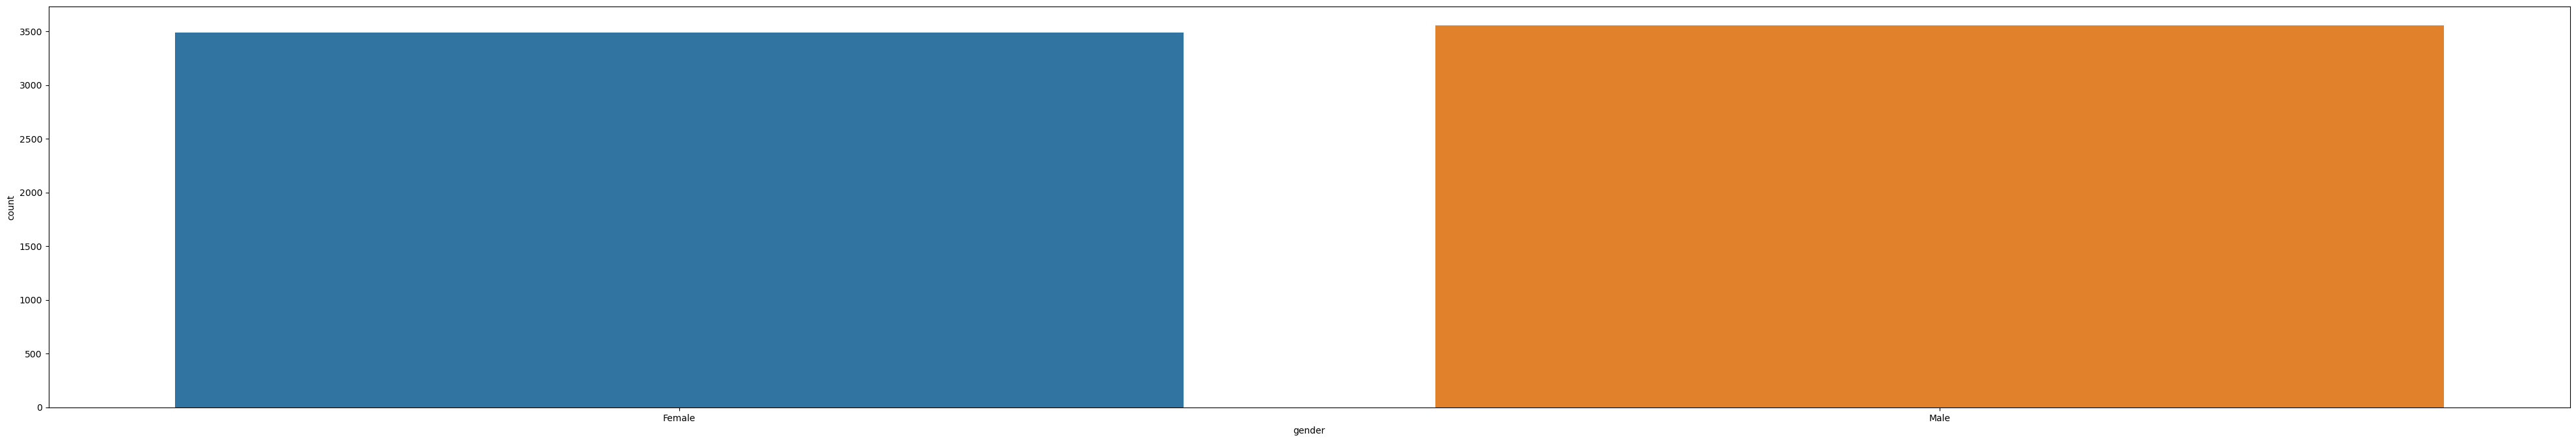

In [41]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='gender',data=df)
print(df['gender'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


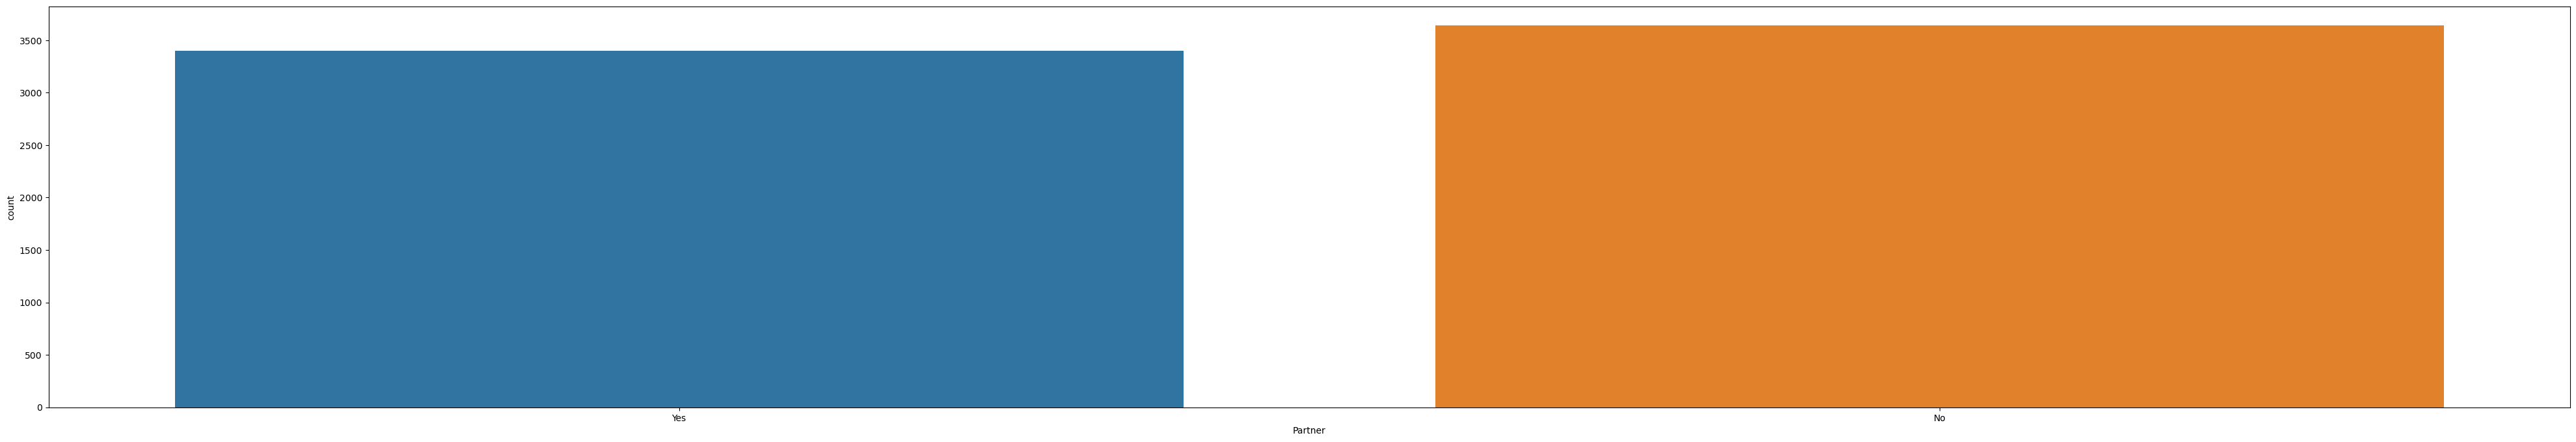

In [42]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='Partner',data=df)
print(df['Partner'].value_counts())

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


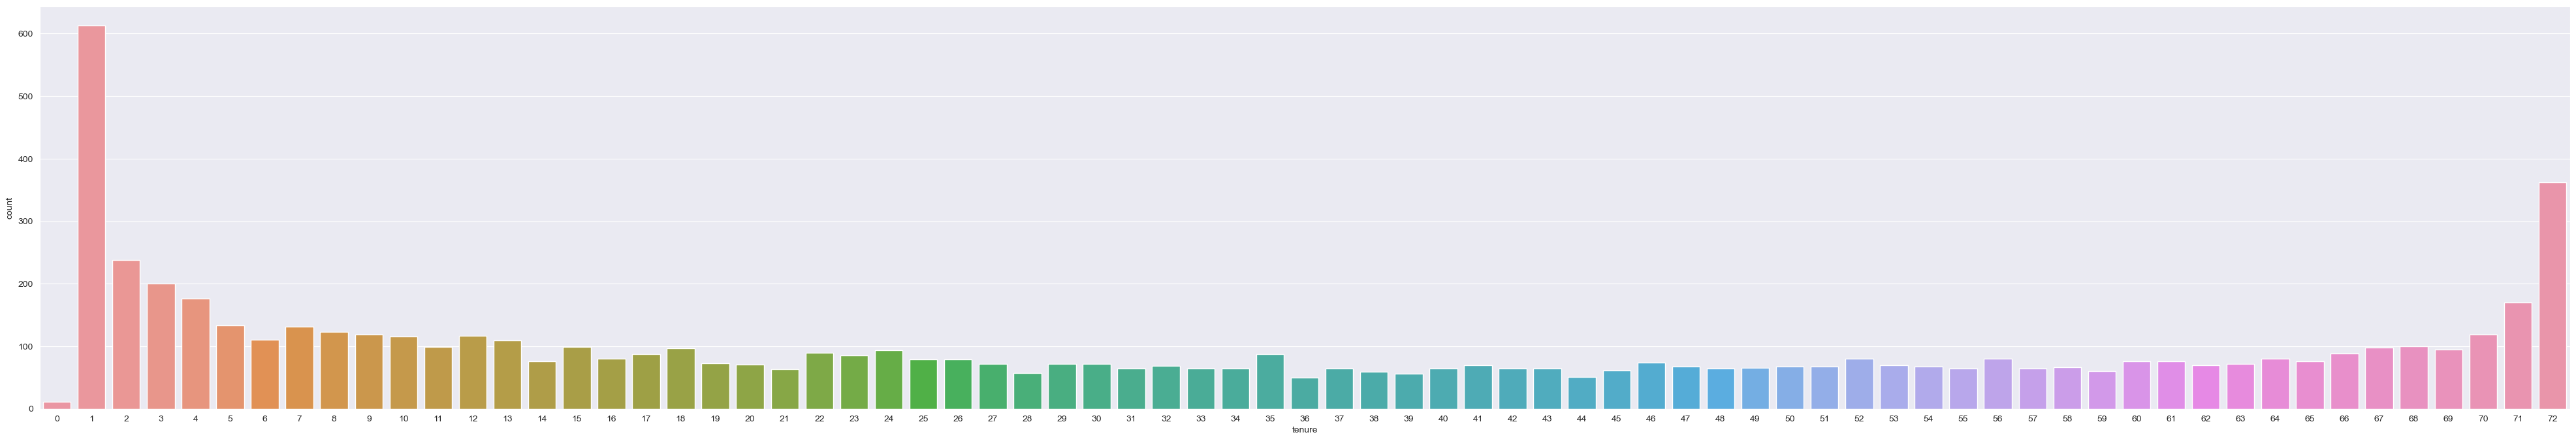

In [245]:
plt.figure(figsize=(50,8))
ax=sns.countplot(x='tenure',data=df)
print(df['tenure'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


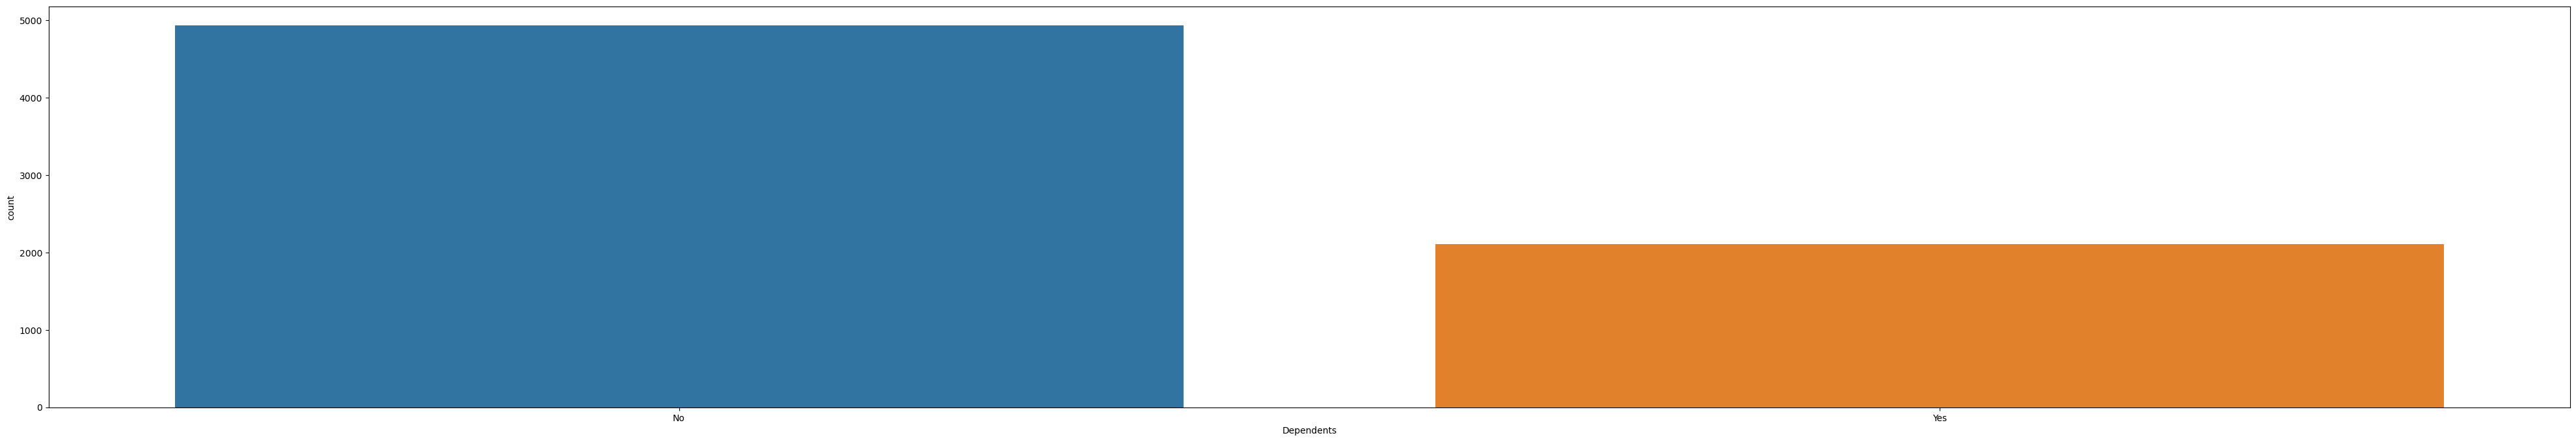

In [43]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


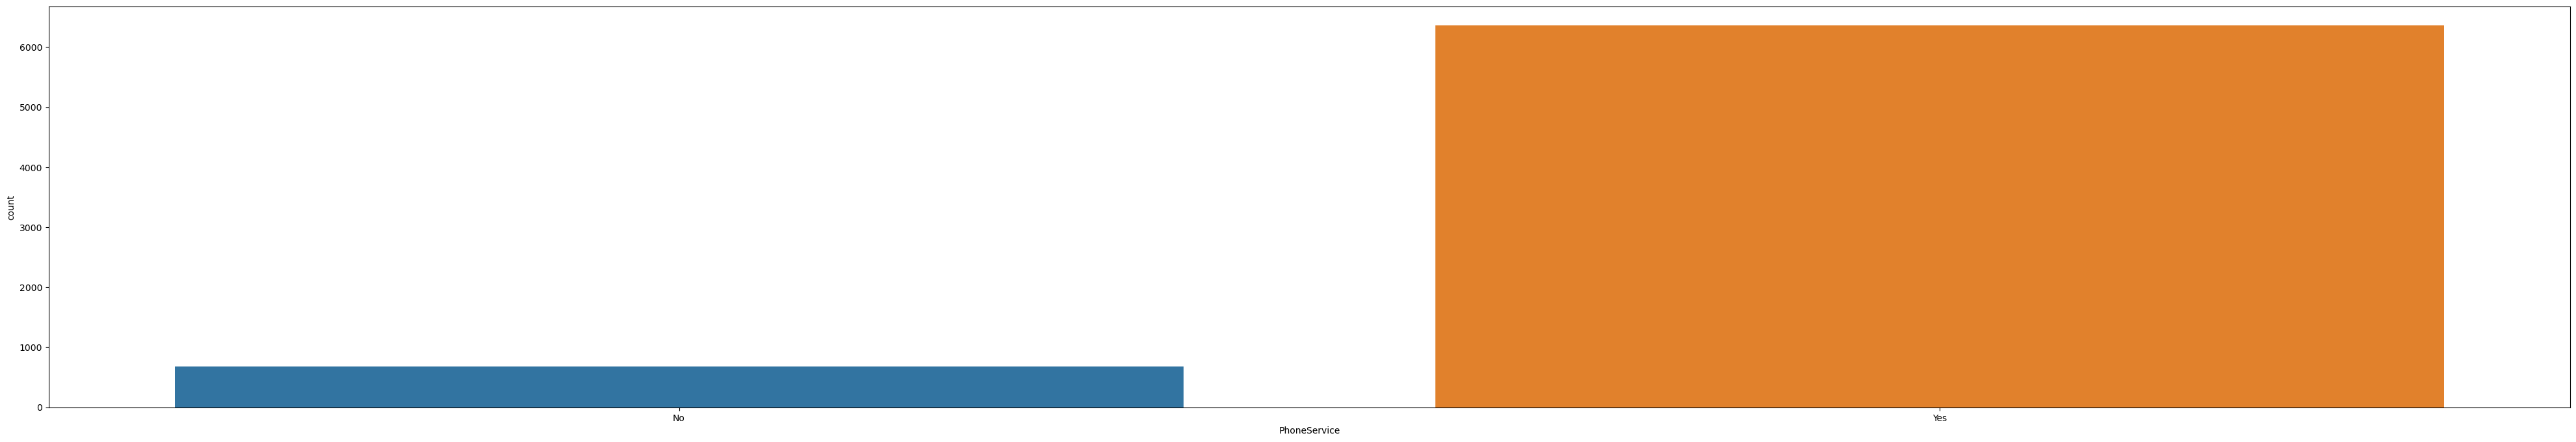

In [44]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='PhoneService',data=df)
print(df['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


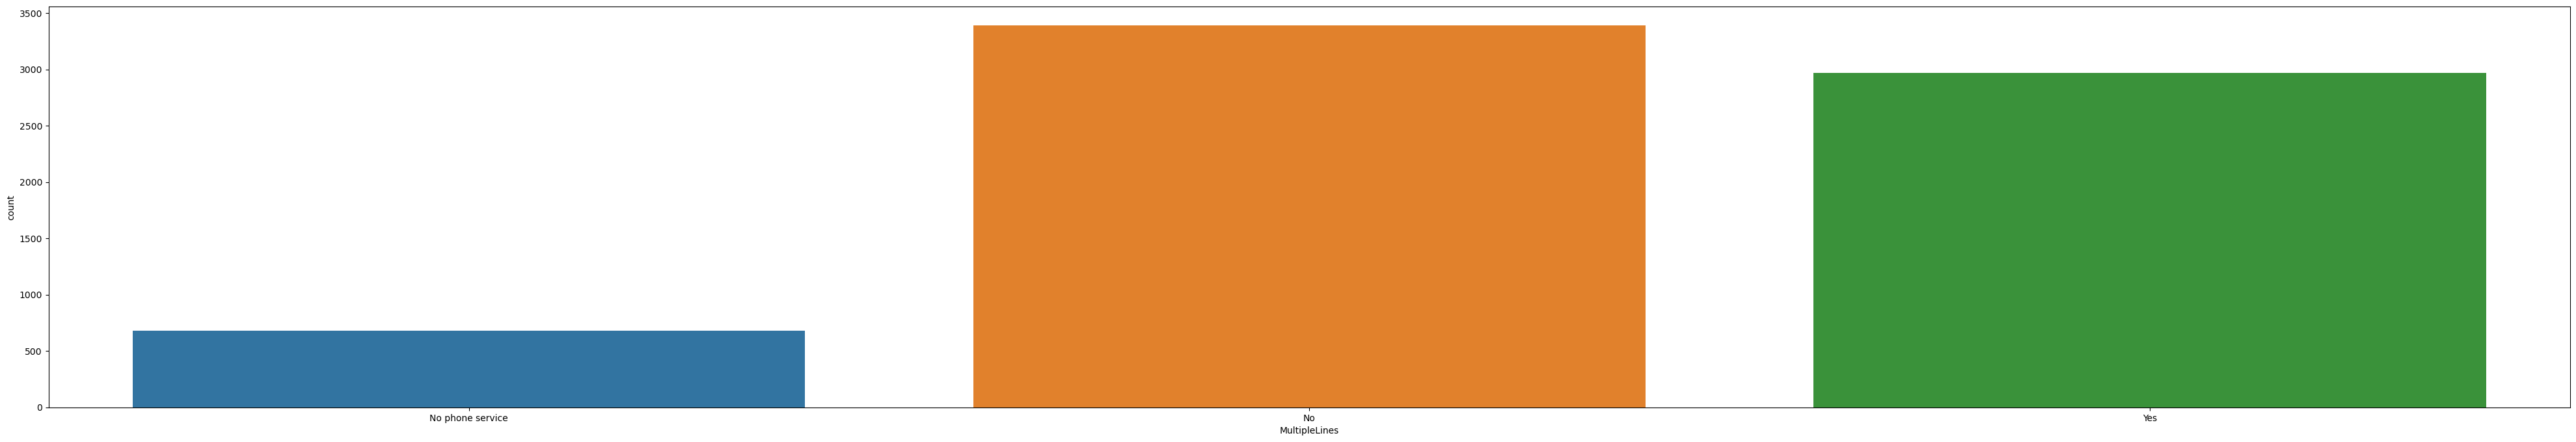

In [45]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='MultipleLines',data=df)
print(df['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


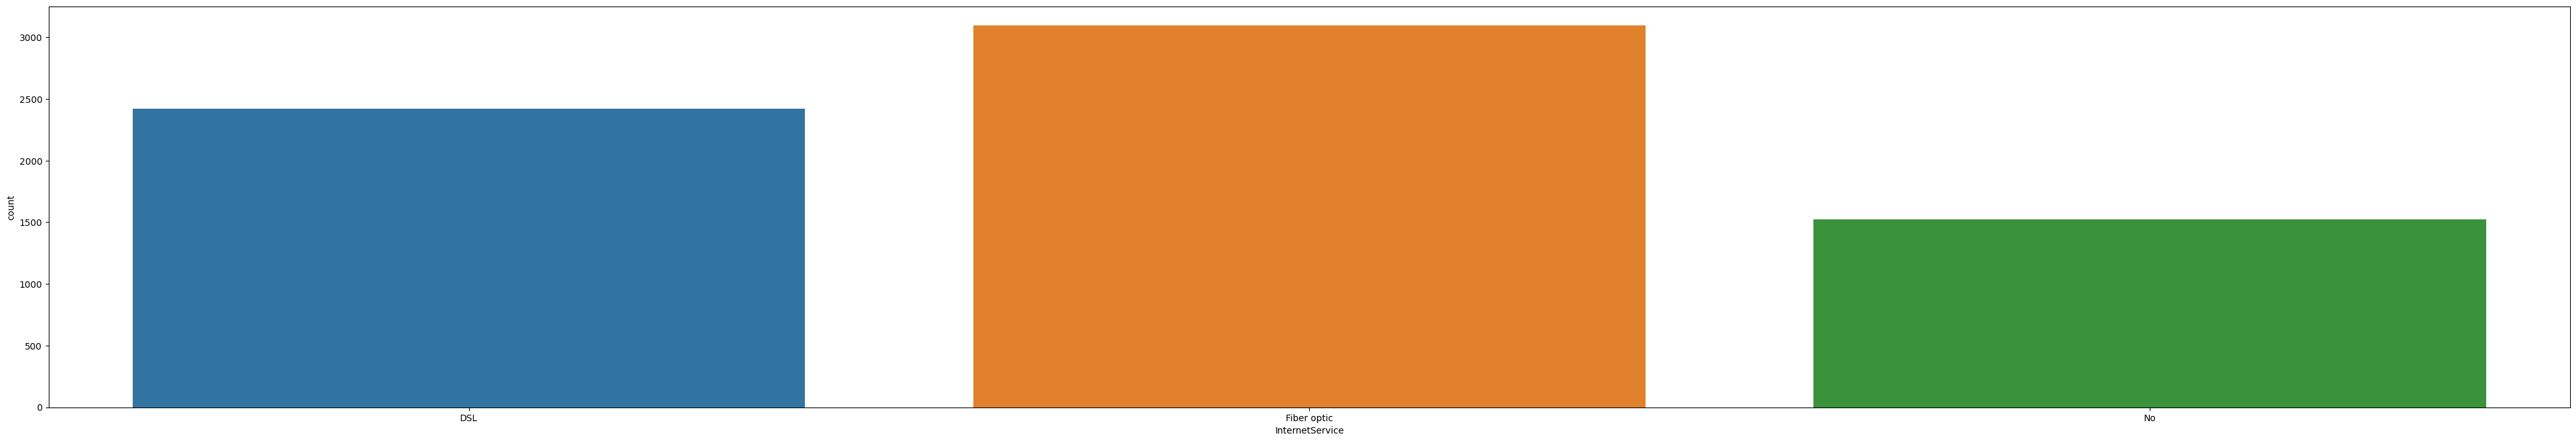

In [48]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='InternetService',data=df)
print(df['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


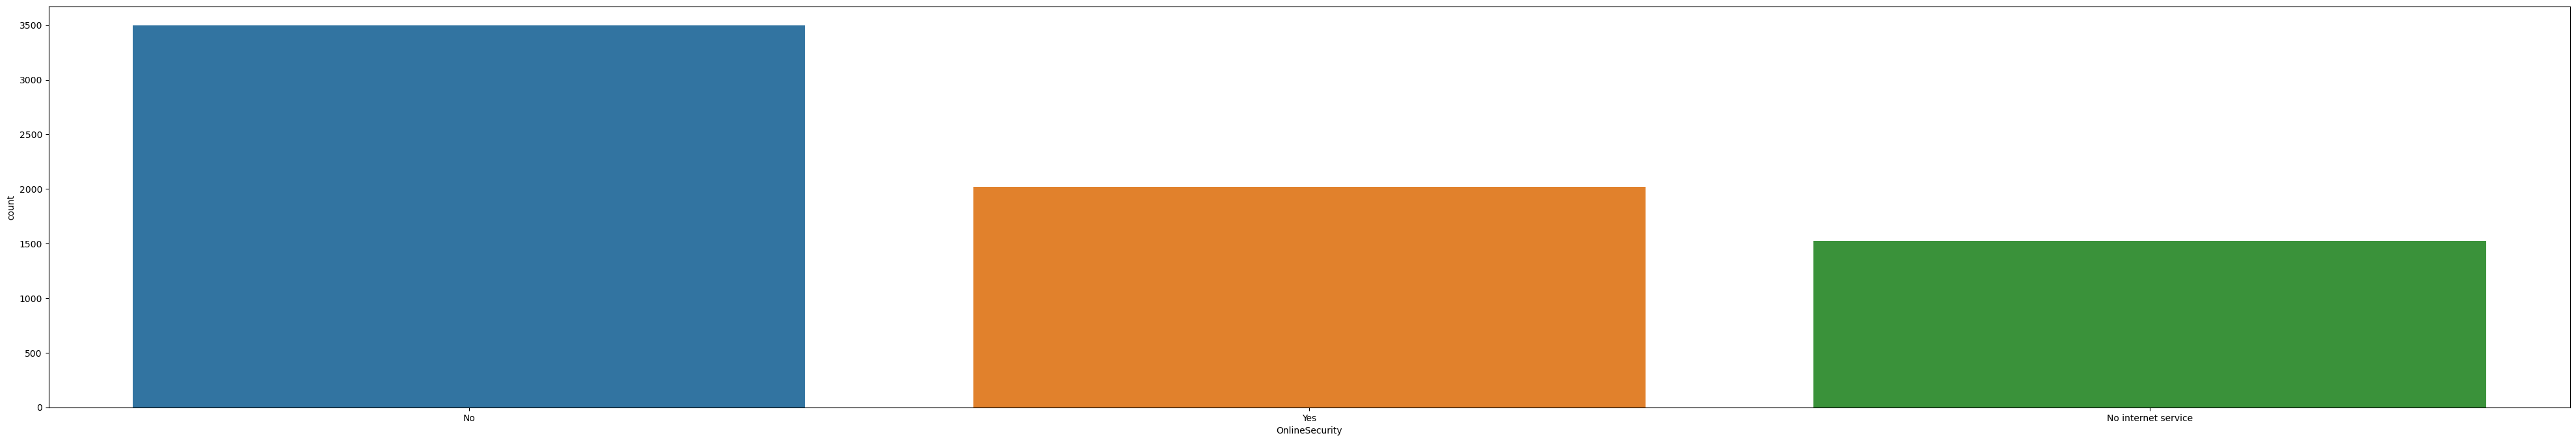

In [49]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='OnlineSecurity',data=df)
print(df['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


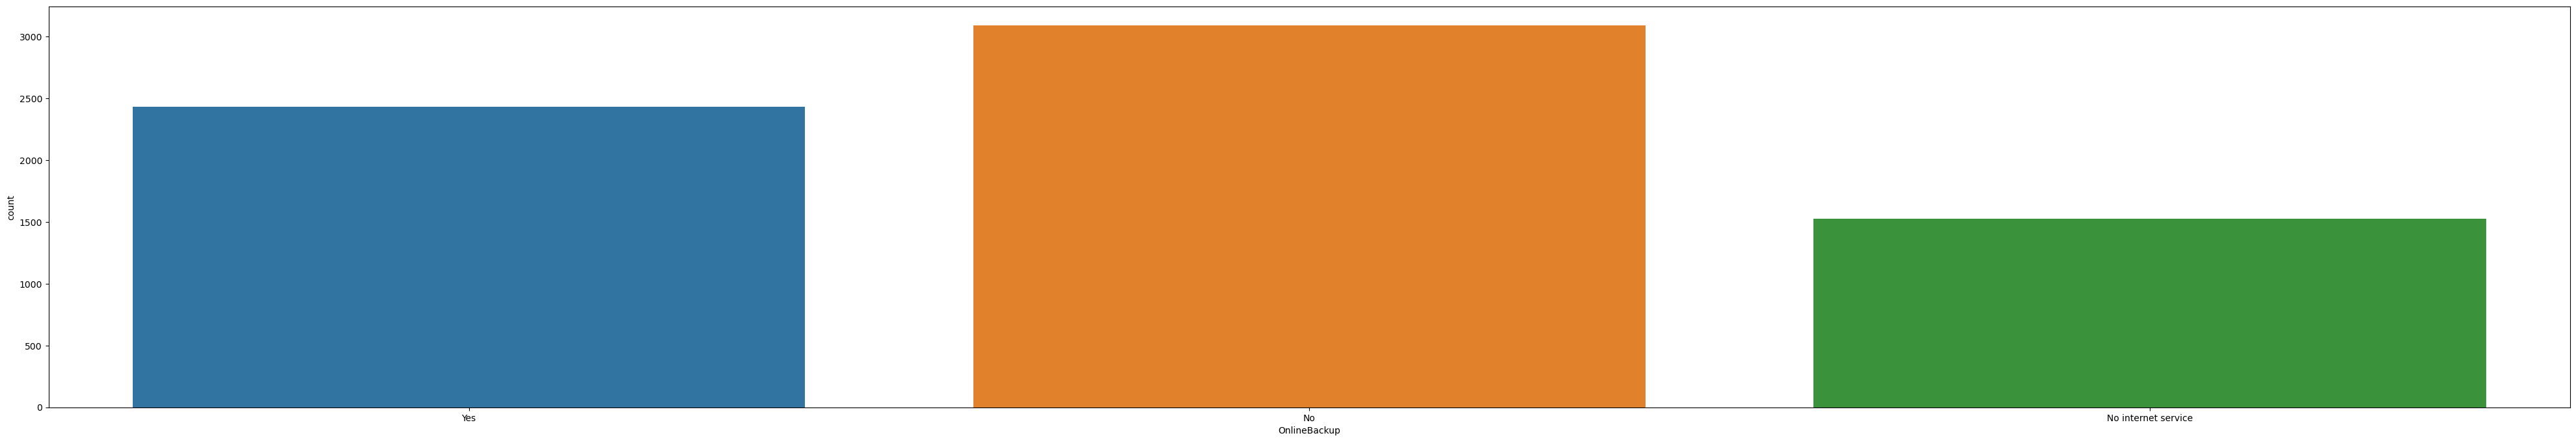

In [50]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='OnlineBackup',data=df)
print(df['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


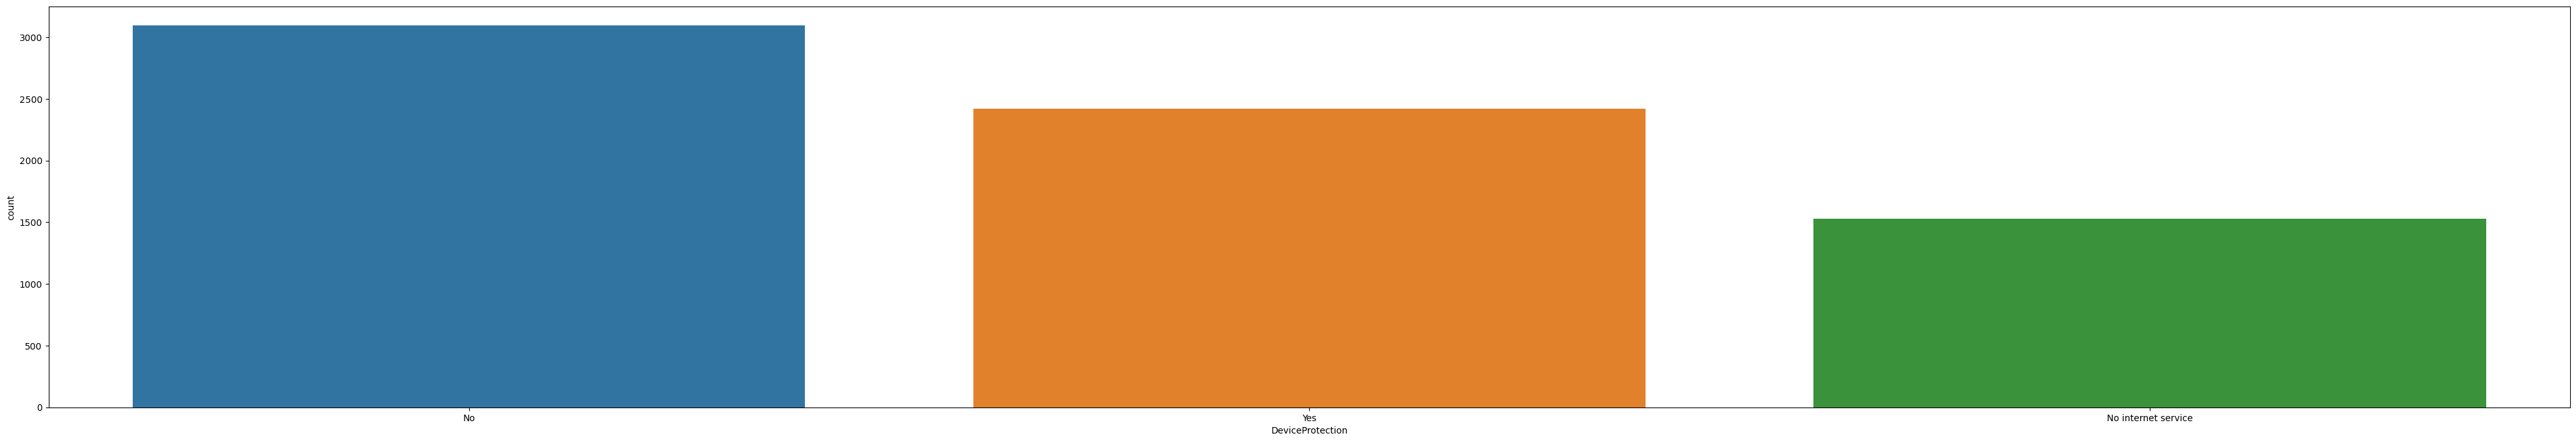

In [51]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='DeviceProtection',data=df)
print(df['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


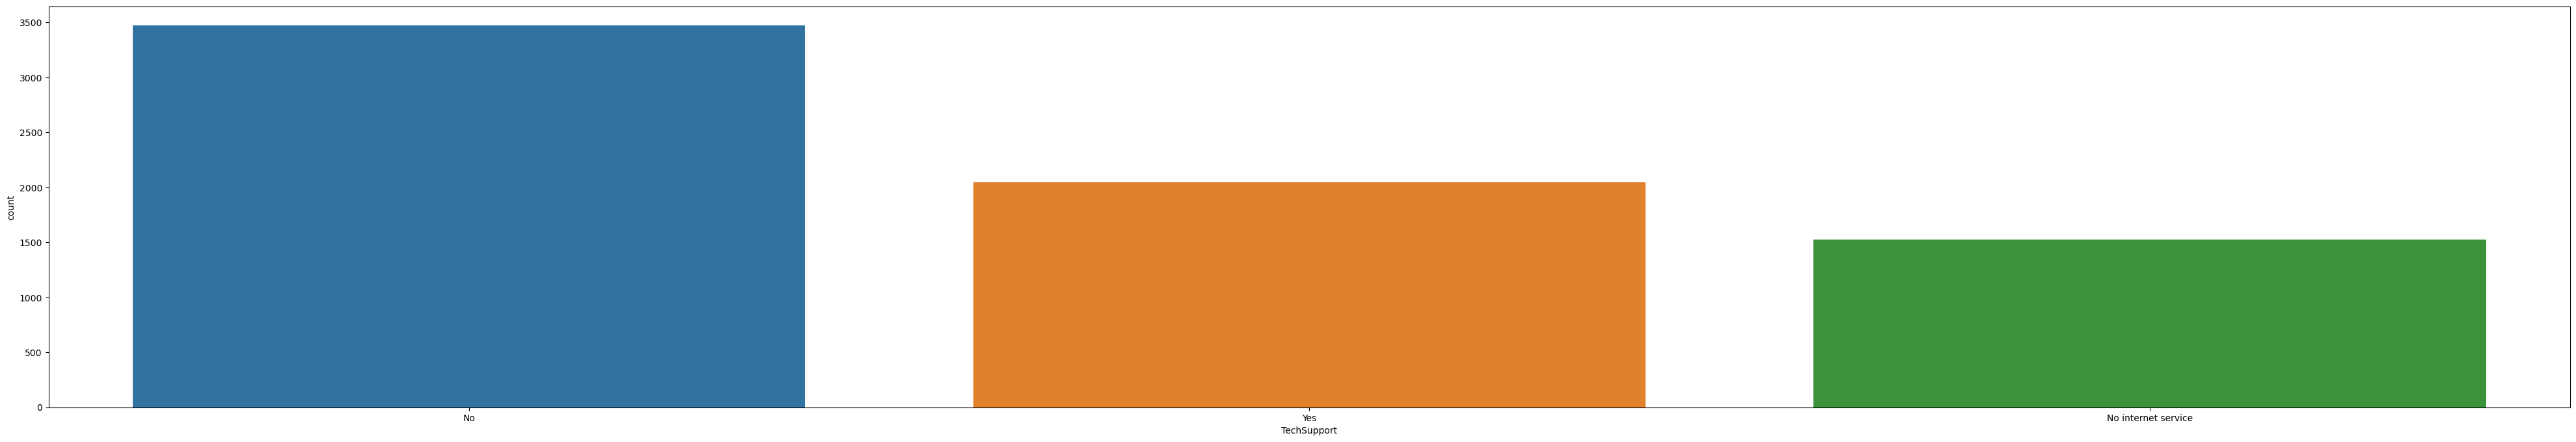

In [52]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='TechSupport',data=df)
print(df['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


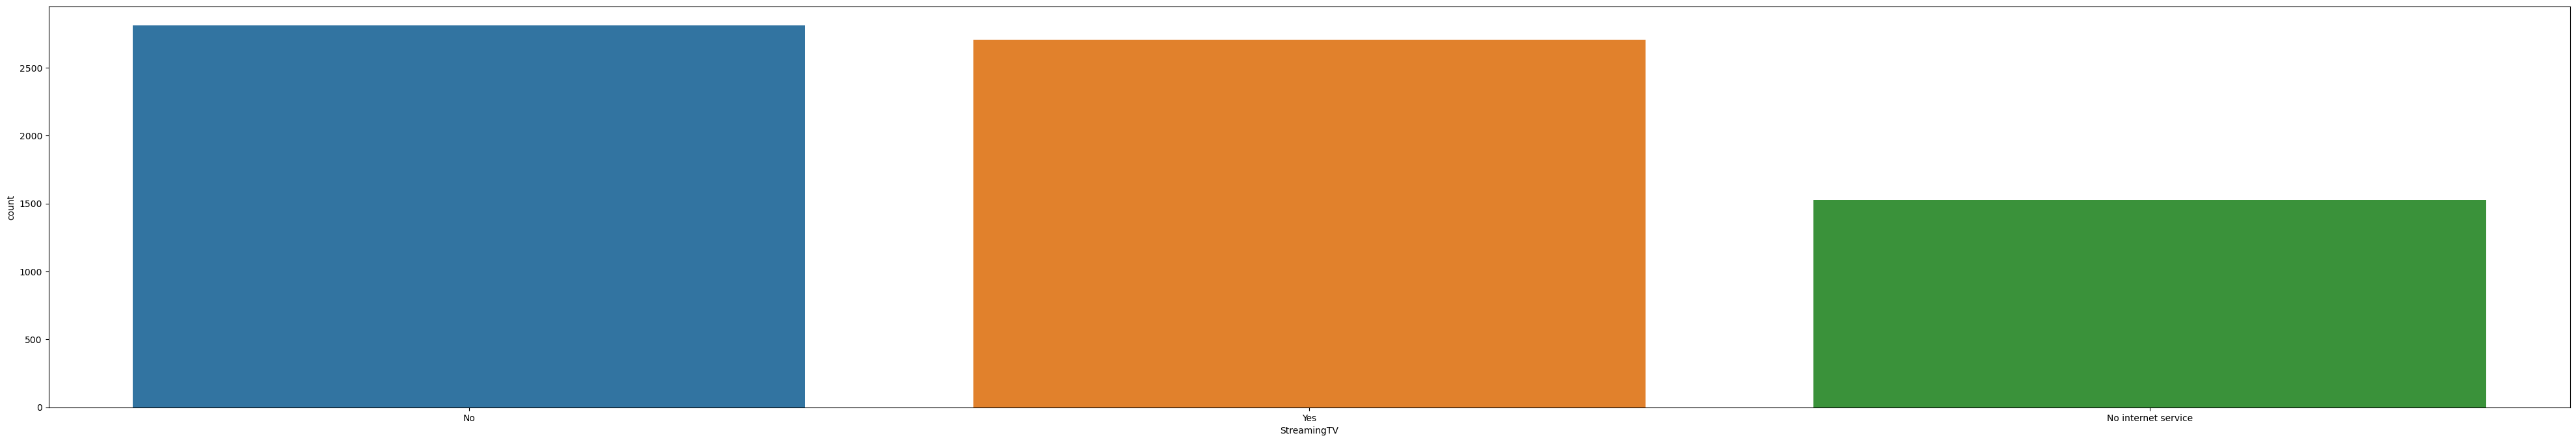

In [54]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='StreamingTV',data=df)
print(df['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


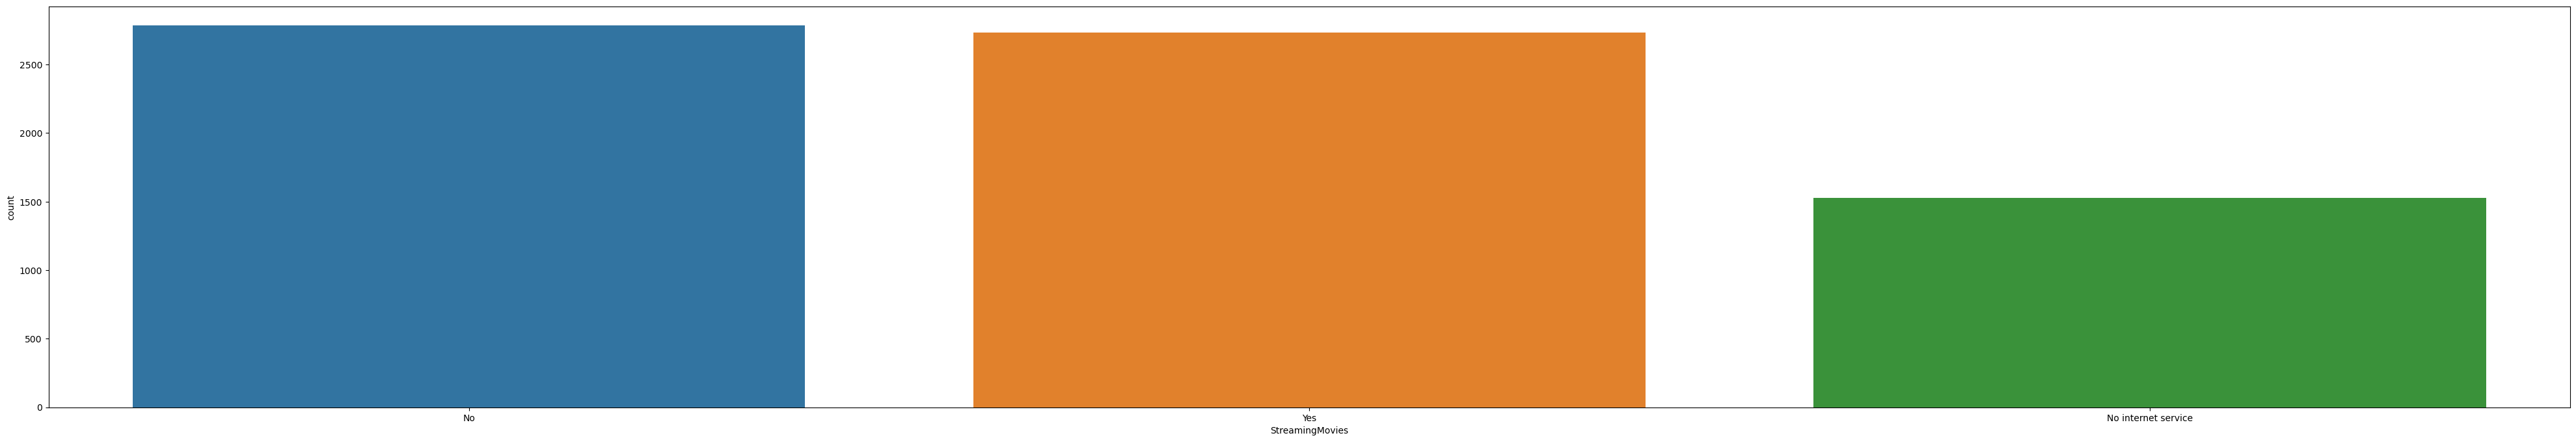

In [55]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='StreamingMovies',data=df)
print(df['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


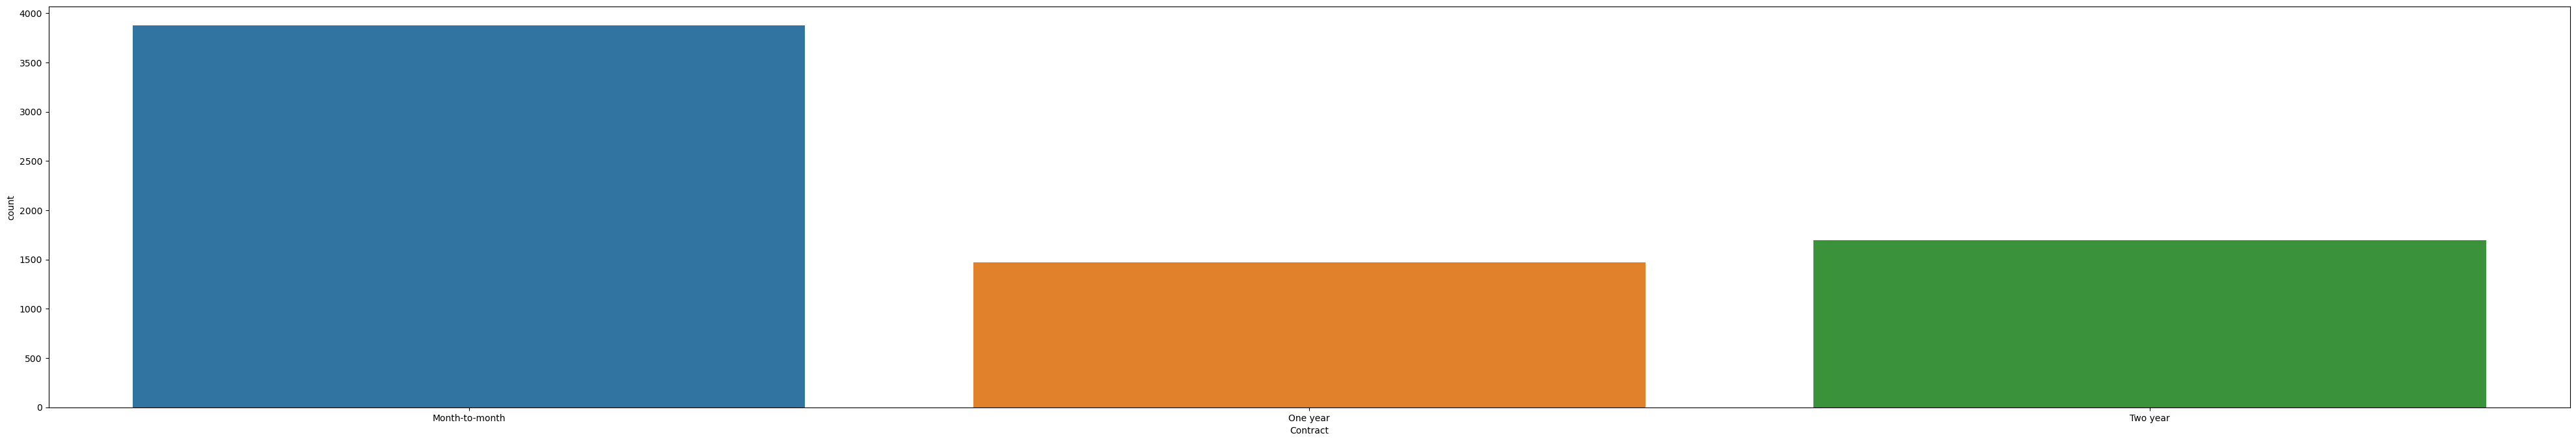

In [56]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='Contract',data=df)
print(df['Contract'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


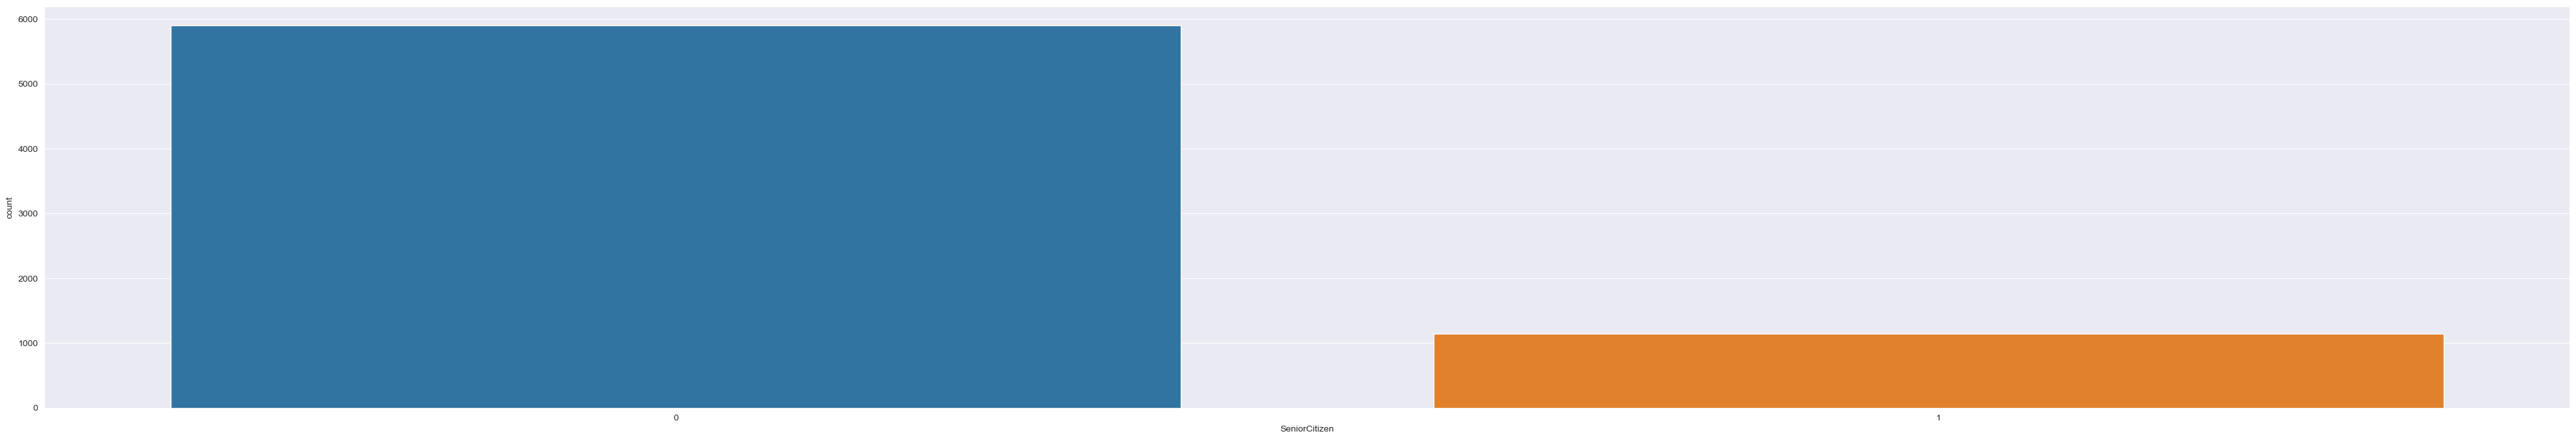

In [241]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='SeniorCitizen',data=df)
print(df['SeniorCitizen'].value_counts())

In [242]:
#Churn yes dataset
churn_yes=pd.DataFrame(df.query('Churn == "Yes"'))

#Churn no dataset
churn_no=pd.DataFrame(df.query('Churn == "No"'))

In [244]:
import plotly.graph_objects as go
# To see the values in each category
churn_yes['SeniorCitizen'].value_counts() #print this result separately

#Plotting the values
colors = ['cadetblue','powderblue']

#Using the values for yes and no that we obtained from the above code
churn_pie1 = go.Figure(data=[go.Pie(labels = ['Yes','No'],
                             values =['476','1393'],pull=[0.3, 0, 0, 0])])
churn_pie1.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20, marker=dict(colors=colors))
churn_pie1.show()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


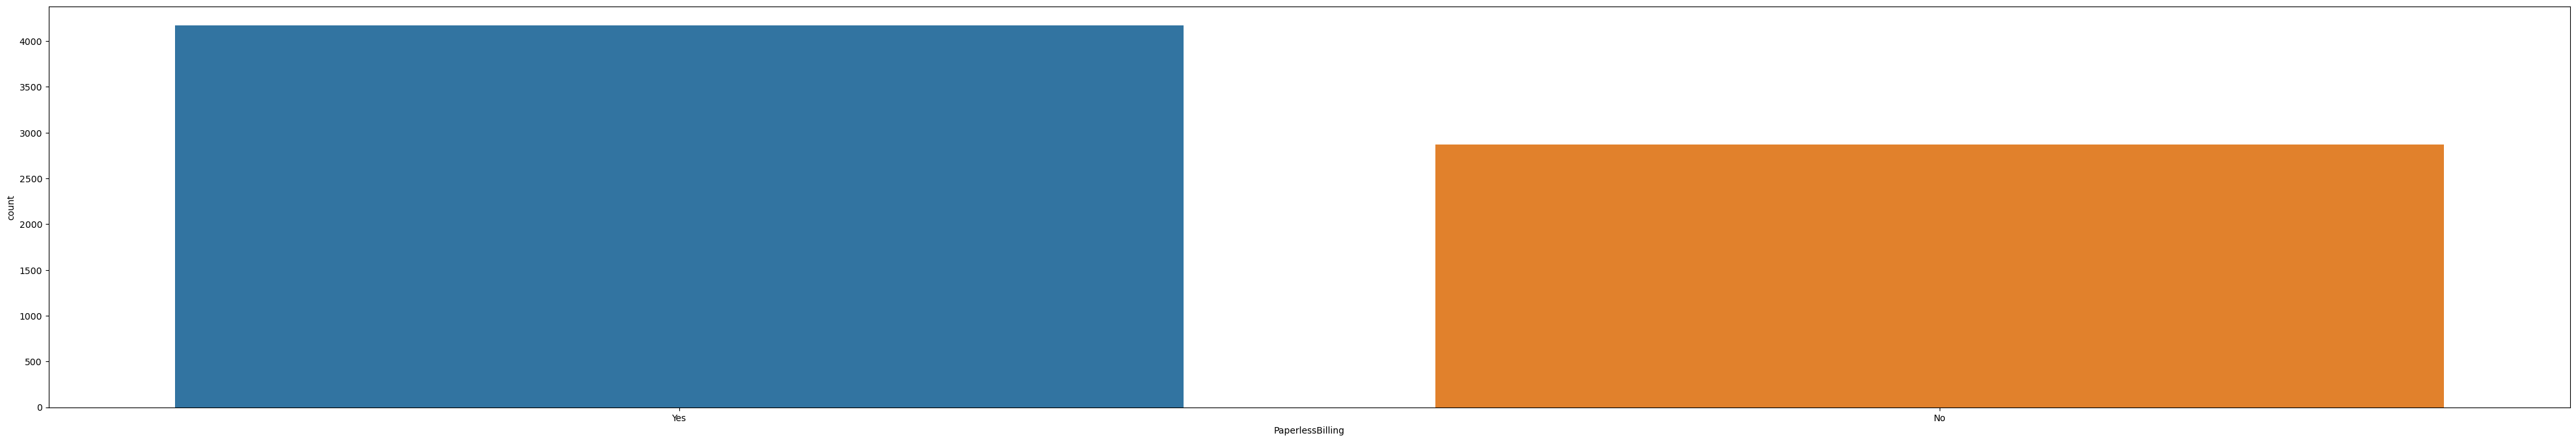

In [58]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='PaperlessBilling',data=df)
print(df['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


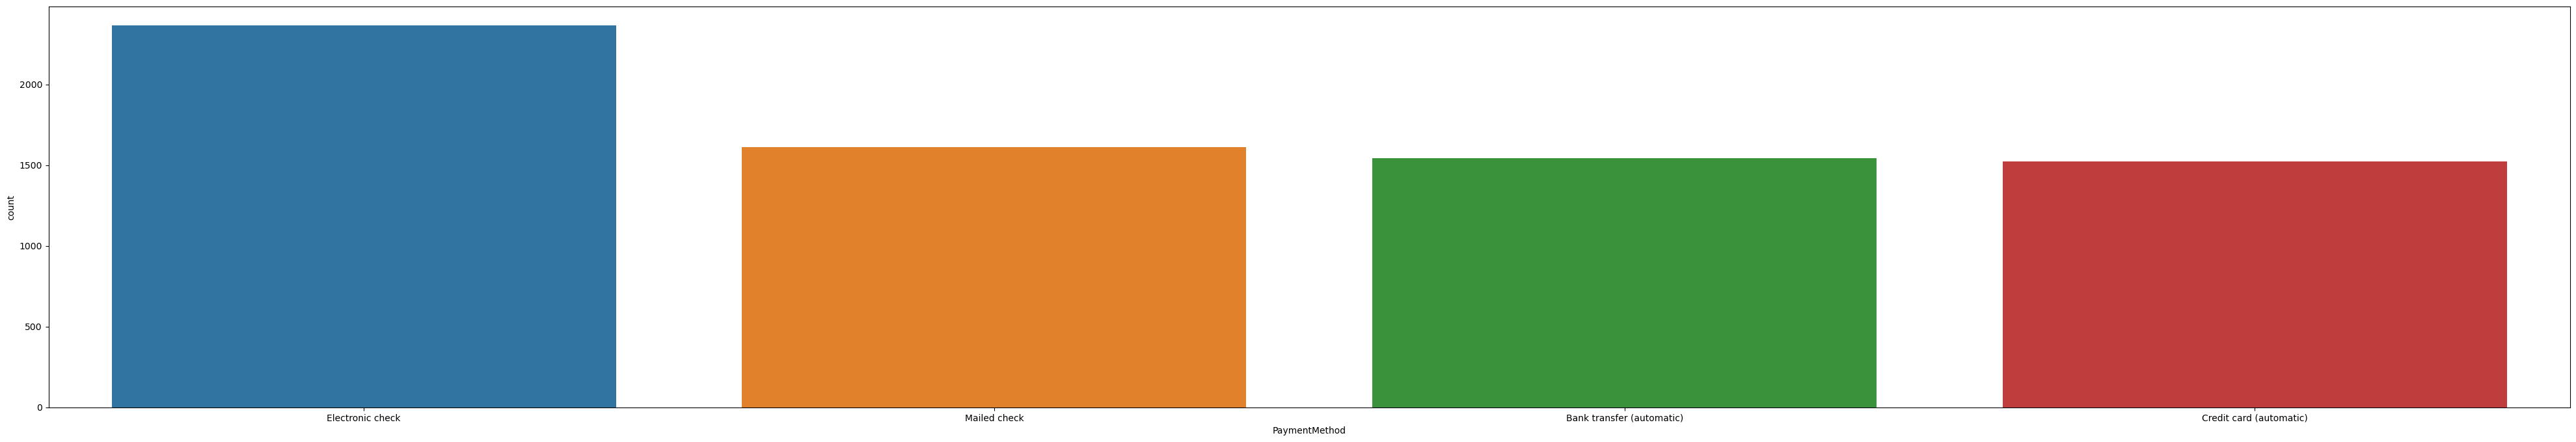

In [59]:


plt.figure(figsize=(50,8))
ax=sns.countplot(x='PaymentMethod',data=df)
print(df['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


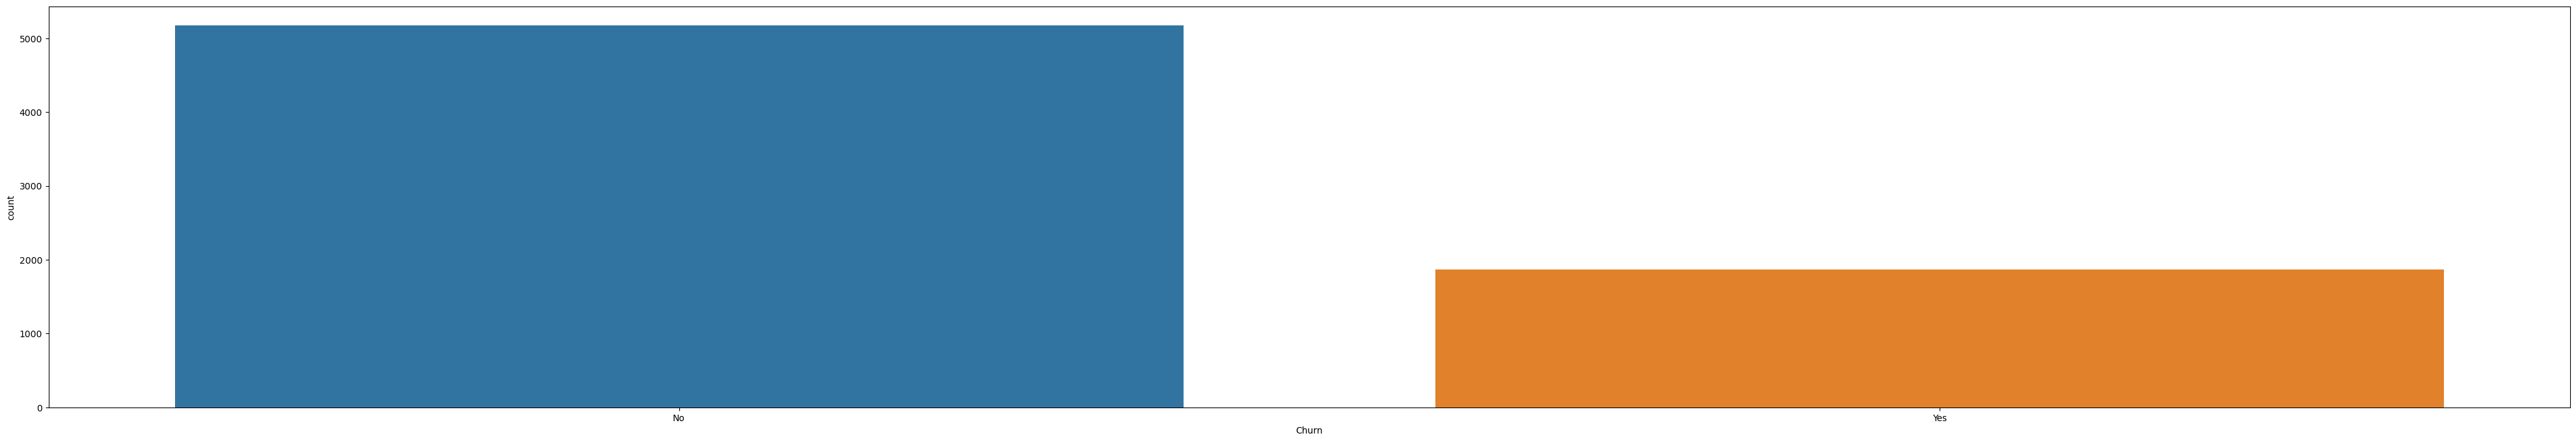

In [61]:

plt.figure(figsize=(50,8))
ax=sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

# Observations Univariate Analysis on Categorical Data 
From the above count plots 
- The Target data is imbalanced and we will have to deal with it
- Majority of the customers that had their contract on a month to month basis.
- For the gender column we have equal distribution of both the male and the female.
- Majority of the customers preferred to make payments with electric cheques 
- Majority of the customers preferred paperless billing.They preferred soft copies for their privacy
- Majority of the customers didnt want techsupport services.I guess they want to avoid additional charges
- Majority of the customers didnt want their device to be protected
- Majority of the customers didnt want online backup services
- Majority of the customers didnt want online security
- Majority of the customers preferred fiberoptic services
- Majority of the customers dont have dependants
- Majority of the customers wanted phone services
- Majority of the customers didnt want multiple lines
- Majority of the customers dont have partners
- 26% of the customers churned obviously for the above subject reasons
- 25% of the senior citizens churned based on the pie chart above.

# Step 3.2 Updating Null values

In [229]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [230]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 # Observations on Null Update 
From the above we can see that there are no null values! 

# Step 3.3 Encoding
- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [231]:
#initializing....

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [232]:
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         5375.0     0.0              0      1.0         0.0       1   
1         3962.0     1.0              0      0.0         0.0      34   
2         2564.0     1.0              0      0.0         0.0       2   
3         5535.0     1.0              0      0.0         0.0      45   
4         6511.0     0.0              0      0.0         0.0       2   
...          ...     ...            ...      ...         ...     ...   
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7040      3367.0     0.0              0      1.0         1.0      11   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0              0.0            1.0              0.0             0.0  ...   
1              1.0            0.0              0.0             2.0  ...   
2              1.0            0.0              0.0             2.0  ...   
3              0.0            1.0              0.0             2.0  ...   
4              1.0            0.0              1.0             0.0  ...   
...            ...            ...              ...             ...  ...   
7038           1.0            2.0              0.0             2.0  ...   
7039           1.0            2.0              1.0             0.0  ...   
7040           0.0            1.0              0.0             2.0  ...   
7041           1.0            2.0              1.0             0.0  ...   
7042           1.0            0.0              1.0             2.0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  0.0          0.0          0.0              0.0       0.0   
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
3                  2.0          2.0          0.0              0.0       1.0   
4                  0.0          0.0          0.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7040               0.0          0.0          0.0              0.0       0.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                  1.0            2.0           29.85        2505.0    0.0  
1                  0.0            3.0           56.95        1466.0    0.0  
2                  1.0            3.0           53.85         157.0    1.0  
3                  0.0            0.0           42.30        1400.0    0.0  
4                  1.0            2.0           70.70         925.0    1.0  
...                ...            ...             ...           ...    ...  
7038               1.0            3.0           84.80        1597.0    0.0  
7039               1.0            1.0          103.20        5698.0    0.0  
7040               1.0            2.0           29.60        2994.0    0.0  
7041               1.0            3.0           74.40        2660.0    1.0  
7042               1.0            0.0          105.65        5407.0    0.0  

[7043 rows x 21 columns]

In [68]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [69]:
#Tranforming into numerical data
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [70]:
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         5375.0     0.0              0      1.0         0.0       1   
1         3962.0     1.0              0      0.0         0.0      34   
2         2564.0     1.0              0      0.0         0.0       2   
3         5535.0     1.0              0      0.0         0.0      45   
4         6511.0     0.0              0      0.0         0.0       2   
...          ...     ...            ...      ...         ...     ...   
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7040      3367.0     0.0              0      1.0         1.0      11   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0              0.0            1.0              0.0             0.0  ...   
1              1.0            0.0              0.0             2.0  ...   
2              1.0            0.0              0.0             2.0  ...   
3              0.0            1.0              0.0             2.0  ...   
4              1.0            0.0              1.0             0.0  ...   
...            ...            ...              ...             ...  ...   
7038           1.0            2.0              0.0             2.0  ...   
7039           1.0            2.0              1.0             0.0  ...   
7040           0.0            1.0              0.0             2.0  ...   
7041           1.0            2.0              1.0             0.0  ...   
7042           1.0            0.0              1.0             2.0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  0.0          0.0          0.0              0.0       0.0   
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
3                  2.0          2.0          0.0              0.0       1.0   
4                  0.0          0.0          0.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7040               0.0          0.0          0.0              0.0       0.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                  1.0            2.0           29.85        2505.0    0.0  
1                  0.0            3.0           56.95        1466.0    0.0  
2                  1.0            3.0           53.85         157.0    1.0  
3                  0.0            0.0           42.30        1400.0    0.0  
4                  1.0            2.0           70.70         925.0    1.0  
...                ...            ...             ...           ...    ...  
7038               1.0            3.0           84.80        1597.0    0.0  
7039               1.0            1.0          103.20        5698.0    0.0  
7040               1.0            2.0           29.60        2994.0    0.0  
7041               1.0            3.0           74.40        2660.0    1.0  
7042               1.0            0.0          105.65        5407.0    0.0  

[7043 rows x 21 columns]

In [71]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0      5375.0     0.0              0      1.0         0.0       1   
1      3962.0     1.0              0      0.0         0.0      34   
2      2564.0     1.0              0      0.0         0.0       2   
3      5535.0     1.0              0      0.0         0.0      45   
4      6511.0     0.0              0      0.0         0.0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0           0.0            1.0              0.0             0.0  ...   
1           1.0            0.0              0.0             2.0  ...   
2           1.0            0.0              0.0             2.0  ...   
3           0.0            1.0              0.0             2.0  ...   
4           1.0            0.0              1.0             0.0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0       0.0   
1               2.0          0.0          0.0              0.0       1.0   
2               0.0          0.0          0.0              0.0       0.0   
3               2.0          2.0          0.0              0.0       1.0   
4               0.0          0.0          0.0              0.0       0.0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0               1.0            2.0           29.85        2505.0    0.0  
1               0.0            3.0           56.95        1466.0    0.0  
2               1.0            3.0           53.85         157.0    1.0  
3               0.0            0.0           42.30        1400.0    0.0  
4               1.0            2.0           70.70         925.0    1.0  

[5 rows x 21 columns]

In [72]:
df.sample()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
2699      6695.0     0.0              1      0.0         0.0      34   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
2699           1.0            2.0              1.0             0.0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
2699               0.0          2.0          2.0              0.0       0.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
2699               1.0            2.0           96.35        2775.0    0.0  

[1 rows x 21 columns]

In [73]:
df.tail()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7040      3367.0     0.0              0      1.0         1.0      11   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
7038           1.0            2.0              0.0             2.0  ...   
7039           1.0            2.0              1.0             0.0  ...   
7040           0.0            1.0              0.0             2.0  ...   
7041           1.0            2.0              1.0             0.0  ...   
7042           1.0            0.0              1.0             2.0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7040               0.0          0.0          0.0              0.0       0.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
7038               1.0            3.0           84.80        1597.0    0.0  
7039               1.0            1.0          103.20        5698.0    0.0  
7040               1.0            2.0           29.60        2994.0    0.0  
7041               1.0            3.0           74.40        2660.0    1.0  
7042               1.0            0.0          105.65        5407.0    0.0  

[5 rows x 21 columns]

In [74]:
df.describe()

customerID       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756       0.162147     0.483033     0.299588   
std    2033.283305     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1760.500000     0.000000       0.000000     0.000000     0.000000   
50%    3521.000000     1.000000       0.000000     0.000000     0.000000   
75%    5281.500000     1.000000       0.000000     1.000000     1.000000   
max    7042.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000      0.000000       0.000000         0.000000   
25%       9.000000      1.000000       0.000000         0.000000   
50%      29.000000      1.000000       1.000000         1.000000   
75%      55.000000      1.000000       2.000000         1.000000   
max      72.000000      1.000000       2.000000         2.000000   

       OnlineSecurity  ...  DeviceProtection  TechSupport  StreamingTV  \
count     7043.000000  ...       7043.000000  7043.000000  7043.000000   
mean         0.790004  ...          0.904444     0.797104     0.985376   
std          0.859848  ...          0.879949     0.861551     0.885002   
min          0.000000  ...          0.000000     0.000000     0.000000   
25%          0.000000  ...          0.000000     0.000000     0.000000   
50%          1.000000  ...          1.000000     1.000000     1.000000   
75%          2.000000  ...          2.000000     2.000000     2.000000   
max          2.000000  ...          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7043.000000  7043.000000       7043.000000    7043.000000   
mean          0.992475     0.690473          0.592219       1.574329   
std           0.885091     0.833755          0.491457       1.068104   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7043.000000   7043.000000  7043.000000  
mean        64.761692   3257.794122     0.265370  
std         30.090047   1888.693496     0.441561  
min         18.250000      0.000000     0.000000  
25%         35.500000   1609.000000     0.000000  
50%         70.350000   3249.000000     0.000000  
75%         89.850000   4901.500000     1.000000  
max        118.750000   6530.000000     1.000000  

[8 rows x 21 columns]

In [77]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

# Observations on Encoding
Frome the above its crystal clear that all Non-numrical data have been converted(encoded) to Numerical Data!

In [78]:
df.shape

(7043, 21)

# Step 2.4 - Observations


# The Dataset is made up of;
- 7043 rows and 21 columns
- 20 features and 1 Target

# Description of Features:
All the features have the following properties:
- It has no null values
- Its Datatypes are floating type
- It is made up of Continous data
- It does not require encoding since they are all continous(numerical) data

# About the Target/Label:
quality: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is an Interger type
- It is made up of Categorical data


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 - Normal Distribution Check

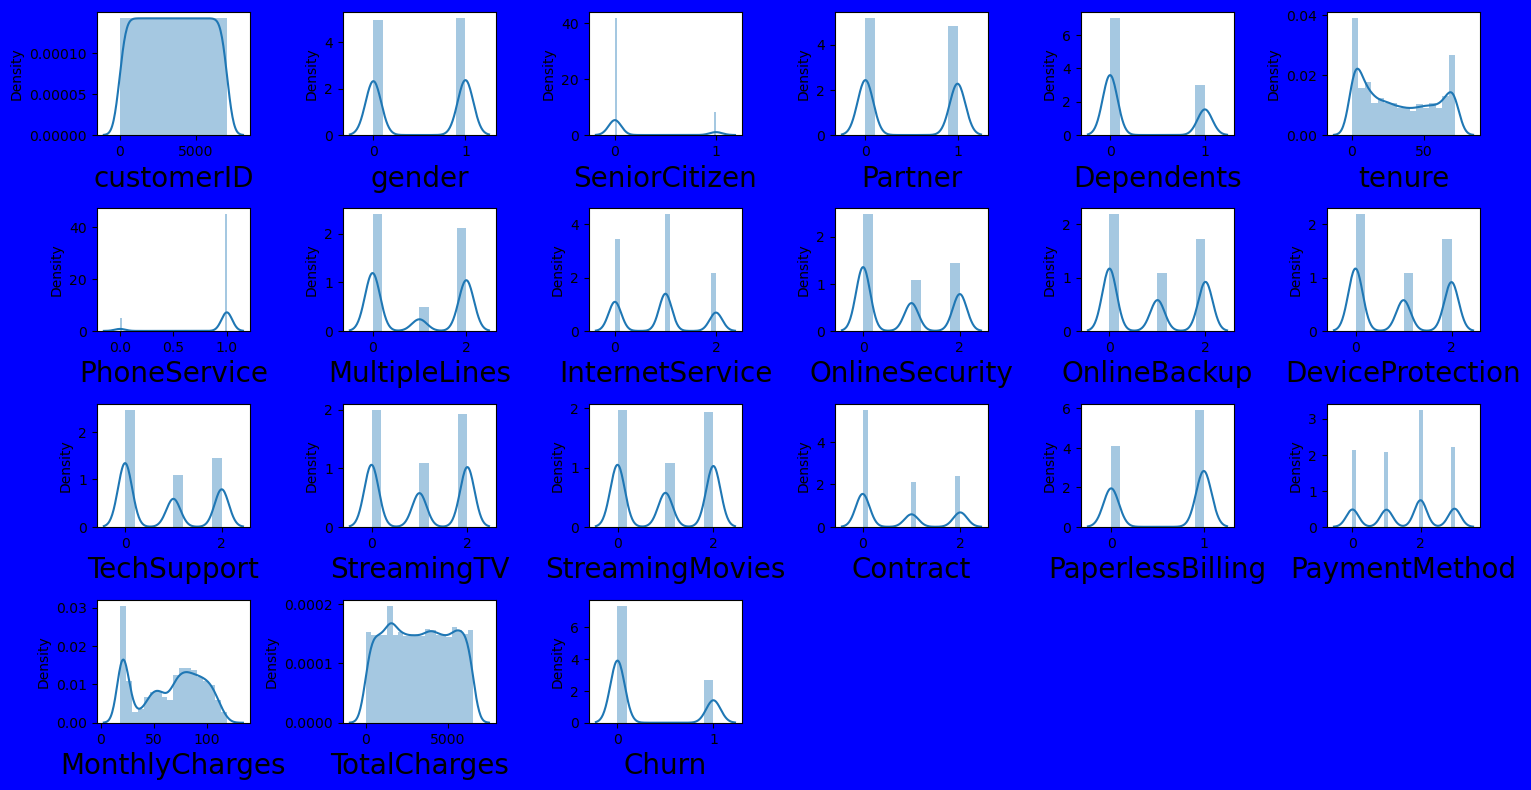

In [79]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=21:#since there are 6 features
        ax = plt.subplot(4,6,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot we can see that the features made up of continous data obeys normal distribution, the building blocks is not in tandem with a normalized curve:

- Monthly Charges
- Total Charges
- Tenure
- The customer id will be dropped because it is not important and contributes nothing to the target


# Step 3.2 - Scatter Plot Check
- Lets visualize the relationship between the features and the Label

In [80]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop('Churn',axis=1)
features

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         5375.0     0.0              0      1.0         0.0       1   
1         3962.0     1.0              0      0.0         0.0      34   
2         2564.0     1.0              0      0.0         0.0       2   
3         5535.0     1.0              0      0.0         0.0      45   
4         6511.0     0.0              0      0.0         0.0       2   
...          ...     ...            ...      ...         ...     ...   
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7040      3367.0     0.0              0      1.0         1.0      11   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0              0.0            1.0              0.0             0.0   
1              1.0            0.0              0.0             2.0   
2              1.0            0.0              0.0             2.0   
3              0.0            1.0              0.0             2.0   
4              1.0            0.0              1.0             0.0   
...            ...            ...              ...             ...   
7038           1.0            2.0              0.0             2.0   
7039           1.0            2.0              1.0             0.0   
7040           0.0            1.0              0.0             2.0   
7041           1.0            2.0              1.0             0.0   
7042           1.0            0.0              1.0             2.0   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0              2.0               0.0          0.0          0.0   
1              0.0               2.0          0.0          0.0   
2              2.0               0.0          0.0          0.0   
3              0.0               2.0          2.0          0.0   
4              0.0               0.0          0.0          0.0   
...            ...               ...          ...          ...   
7038           0.0               2.0          2.0          2.0   
7039           2.0               2.0          0.0          2.0   
7040           0.0               0.0          0.0          0.0   
7041           0.0               0.0          0.0          0.0   
7042           0.0               2.0          2.0          2.0   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0                 0.0       0.0               1.0            2.0   
1                 0.0       1.0               0.0            3.0   
2                 0.0       0.0               1.0            3.0   
3                 0.0       1.0               0.0            0.0   
4                 0.0       0.0               1.0            2.0   
...               ...       ...               ...            ...   
7038              2.0       1.0               1.0            3.0   
7039              2.0       1.0               1.0            1.0   
7040              0.0       0.0               1.0            2.0   
7041              0.0       0.0               1.0            3.0   
7042              2.0       2.0               1.0            0.0   

      MonthlyCharges  TotalCharges  
0              29.85        2505.0  
1              56.95        1466.0  
2              53.85         157.0  
3              42.30        1400.0  
4              70.70         925.0  
...              ...           ...  
7038           84.80        1597.0  
7039          103.20        5698.0  
7040           29.60        2994.0  
7041           74.40        2660.0  
7042          105.65        5407.0  

[7043 rows x 20 columns]

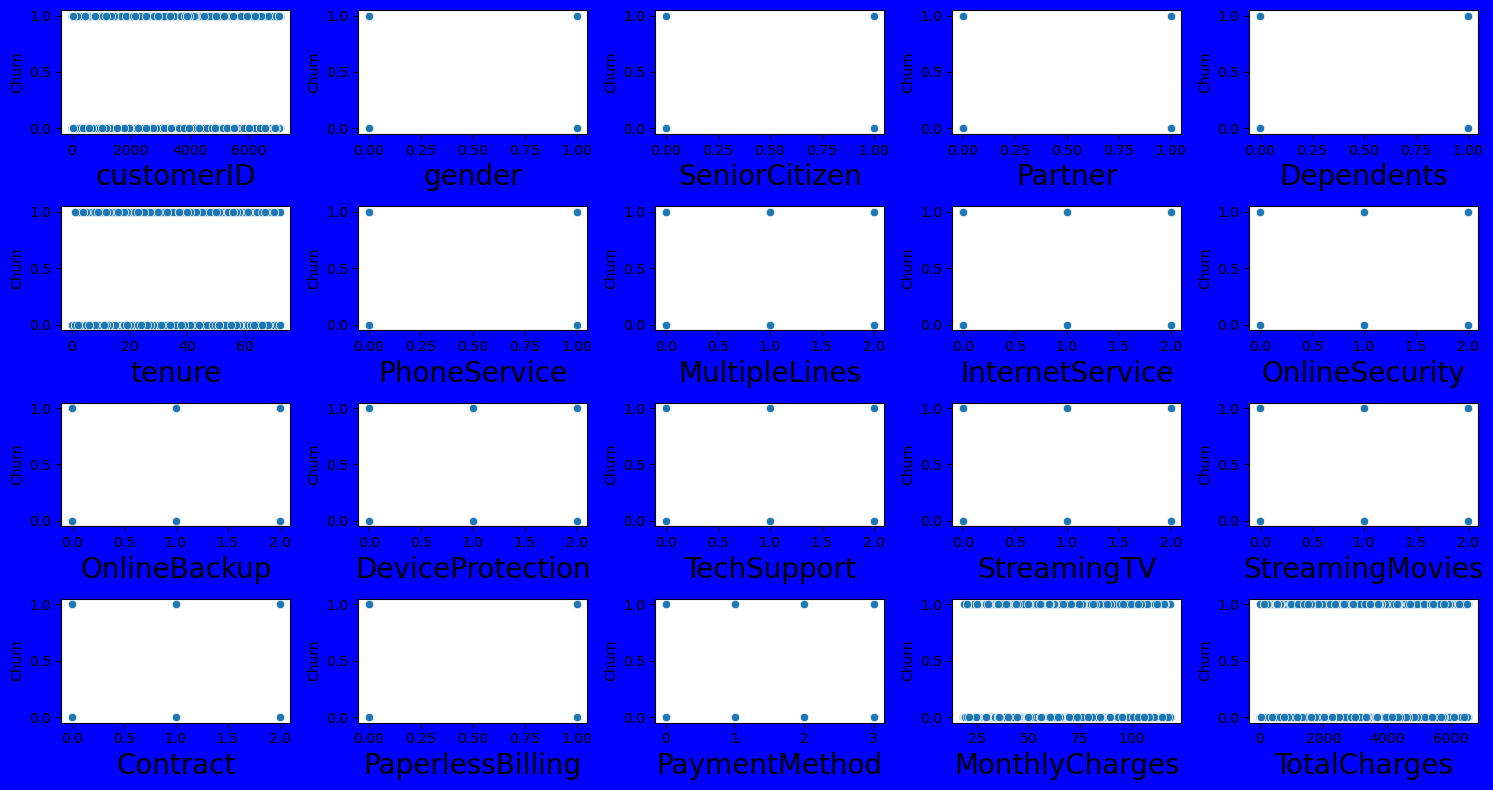

In [82]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=20:#since there are 6 features
        ax = plt.subplot(4,5,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['Churn'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot
From the above scatter plot we can see a strong relationship between the below features and the Label(Salary)

- Monthly charges
- Total Charges
- Tenure
The other features are categorical features

# Step 3.3 - Correlation Check;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [83]:
#checking for general correlation
df.corr()

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.021398  0.166330    0.080537   
TechSupport         0.001140 -0.006825      -0.151268  0.126733    0.133524   
StreamingTV        -0.007777 -0.006421       0.030776  0.137341    0.046885   
StreamingMovies    -0.016746 -0.008743       0.047266  0.129574    0.021321   
Contract            0.015028  0.000126      -0.142554  0.294806    0.243187   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.011604  0.017352      -0.038551 -0.154798   -0.040292   
MonthlyCharges     -0.003916 -0.014569       0.220173  0.096848   -0.113890   
TotalCharges        0.003027 -0.005291       0.037653  0.059568   -0.009572   
Churn              -0.017447 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.008035     -0.006483       0.004316        -0.012407   
gender            0.005106     -0.006488      -0.006739        -0.000863   
SeniorCitizen     0.016567      0.008576       0.146185        -0.032310   
Partner           0.379697      0.017706       0.142410         0.000891   
Dependents        0.159712     -0.001762      -0.024991         0.044590   
tenure            1.000000      0.008448       0.343032        -0.030359   
PhoneService      0.008448      1.000000      -0.020538         0.387436   
MultipleLines     0.343032     -0.020538       1.000000        -0.109216   
InternetService  -0.030359      0.387436      -0.109216         1.000000   
OnlineSecurity    0.325468     -0.015198       0.007141        -0.028416   
OnlineBackup      0.370876      0.024105       0.117327         0.036138   
DeviceProtection  0.371105      0.003727       0.122318         0.044944   
TechSupport       0.322942     -0.019158       0.011466        -0.026047   
StreamingTV       0.289373      0.055353       0.175059         0.107417   
StreamingMovies   0.296866      0.043870       0.180957         0.098350   
Contract          0.671607      0.002247       0.110842         0.099721   
PaperlessBilling  0.006152      0.016505       0.165146        -0.138625   
PaymentMethod    -0.370436     -0.004184      -0.176793         0.086140   
MonthlyCharges    0.247900      0.247398       0.433576        -0.323260   
TotalCharges      0.158523      0.083195       0.114955        -0.055724   
Churn            -0.352229      0.011942       0.038037        -0.047291   

                  OnlineSecurity  ...  DeviceProtection  TechSupport  \
customerID              0.013292  ...         -0.006918     0.001140   
gender                 -0.015017  ...          0.000549    -0.006825   
SeniorCitizen          -0.128221  ...         -0.021398    -0.151268   
Partner                 0.150828  ...          0.166330     0.126733   
Dependents              0.152166  ...          0.080537     0.133524   
tenure                  0.325468  ...          0.371105     0.322942   
PhoneService           -0.015198  ...          0.003727    -0.019158   
MultipleLines           0.0071

In [85]:
#checking for correlation between each feature and Label
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
TotalCharges        0.014479
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

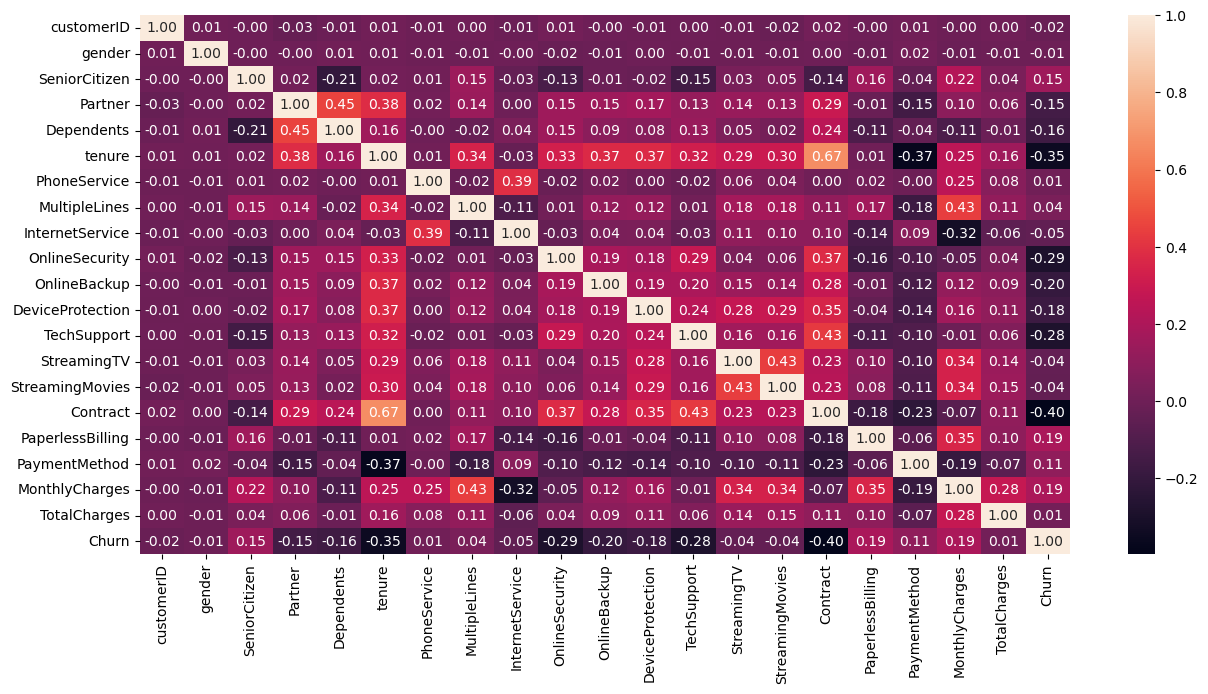

In [86]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

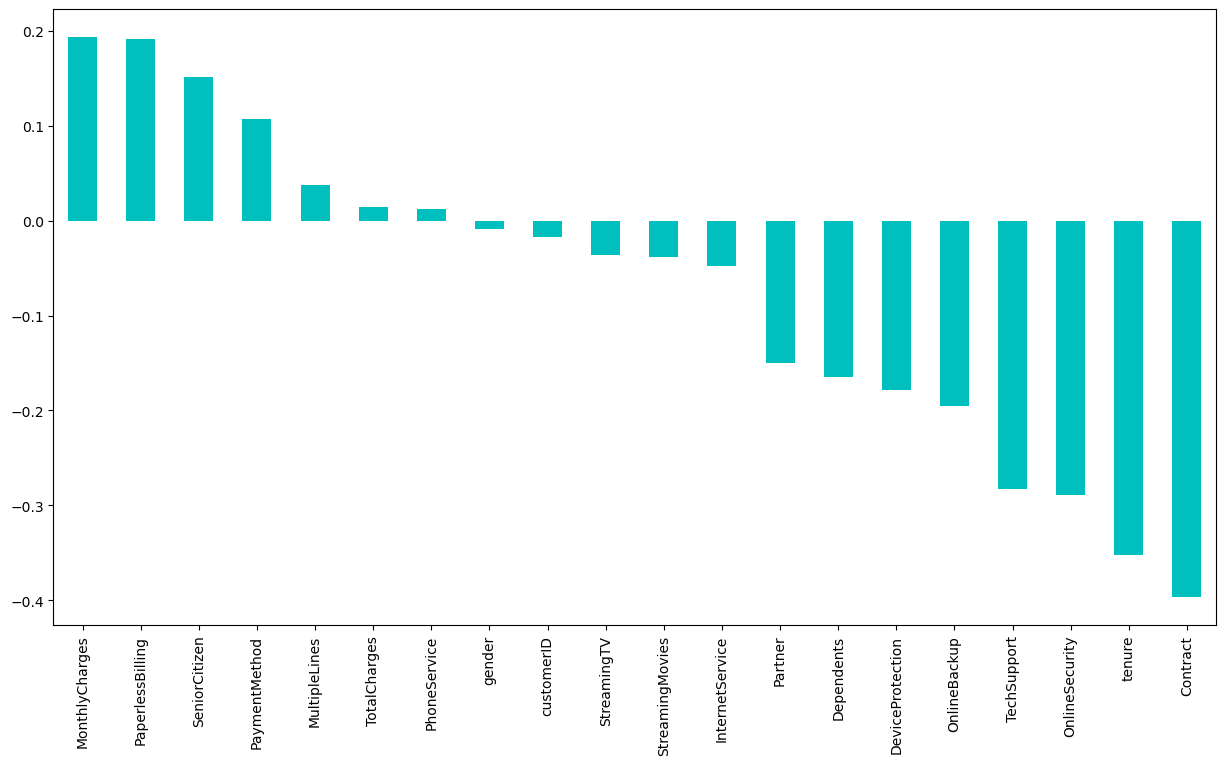

In [87]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar', color='c')
plt.show()

# Observations on Correlation
From the above correlation statistics;

Collinearity:
    
   - Contract           -0.396713
      contract has a negative correlation of 39% and this is a fairly good bond
   - tenure             -0.352229
       tenure has a negative correlation of 35% and this is a fairly good bond.
   - OnlineSecurity     -0.289309
       online security has a negative correlation of 29% and this is a fairly good bond.
   - TechSupport        -0.282492
       Techsupport has a negative correlation of 28% and this is a fairly good bond.
       
   - OnlineBackup       -0.195525
       online backup has a negative correlation of 20% and this is a fairly good bond.
   - DeviceProtection   -0.178134
       device protection has a negative correlation of 18% and this is a fairly good bond.
   - Dependents         -0.164221
       dependents has a negative correlation of 16% and this is a fairly good bond.
   - Partner            -0.150448
       partner has a negative correlation of 15% and this is a fairly good bond.
   - InternetService    -0.047291
       internet service has a 4% negative correlation and this is a poor bond. 
         
   - StreamingMovies    -0.038492
       streaming movies has a negative correlation of 4% and this is a poor bond.
   - StreamingTV        -0.036581
       streamintv has a negative correlation of 4% and this is a poor bond.
   - gender             -0.008612
       gender has zero correlation of 0.8% no bond
   - PhoneService        0.011942
       PhoneService has zero correlation of 0.1% no bond
   - TotalCharges        0.014479
      TotalCharges has zero correlation of 0.1% no bond
   - MultipleLines       0.038037
       MultipleLines has zero correlation of 0.1% no bond
   - PaymentMethod       0.107062
       paymentmethod has a positive correlation of 15% and this is fairly good bond.
   - SeniorCitizen       0.150889
       SeniorCitizen  has a positive correlation of 15% and this is fairly good bond.
   - PaperlessBilling    0.191825
       PaperlessBilling has a positive correlation of 19% and this is fairly good bond.
   - MonthlyCharges      0.193356
       monthly charges has a positive correlation of 19% and this is fairly good bond.

 
 - Feature with Maximum correlation = Contract
 - Feature with Minimum correlation = paymentmethod
 
Multicollinearity:
 - From the heatmap we can see that the pairs of features have some noticeable correllation between them 
     -Contract vs tenure has a correlation of 67%
   But we will reconfrim during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

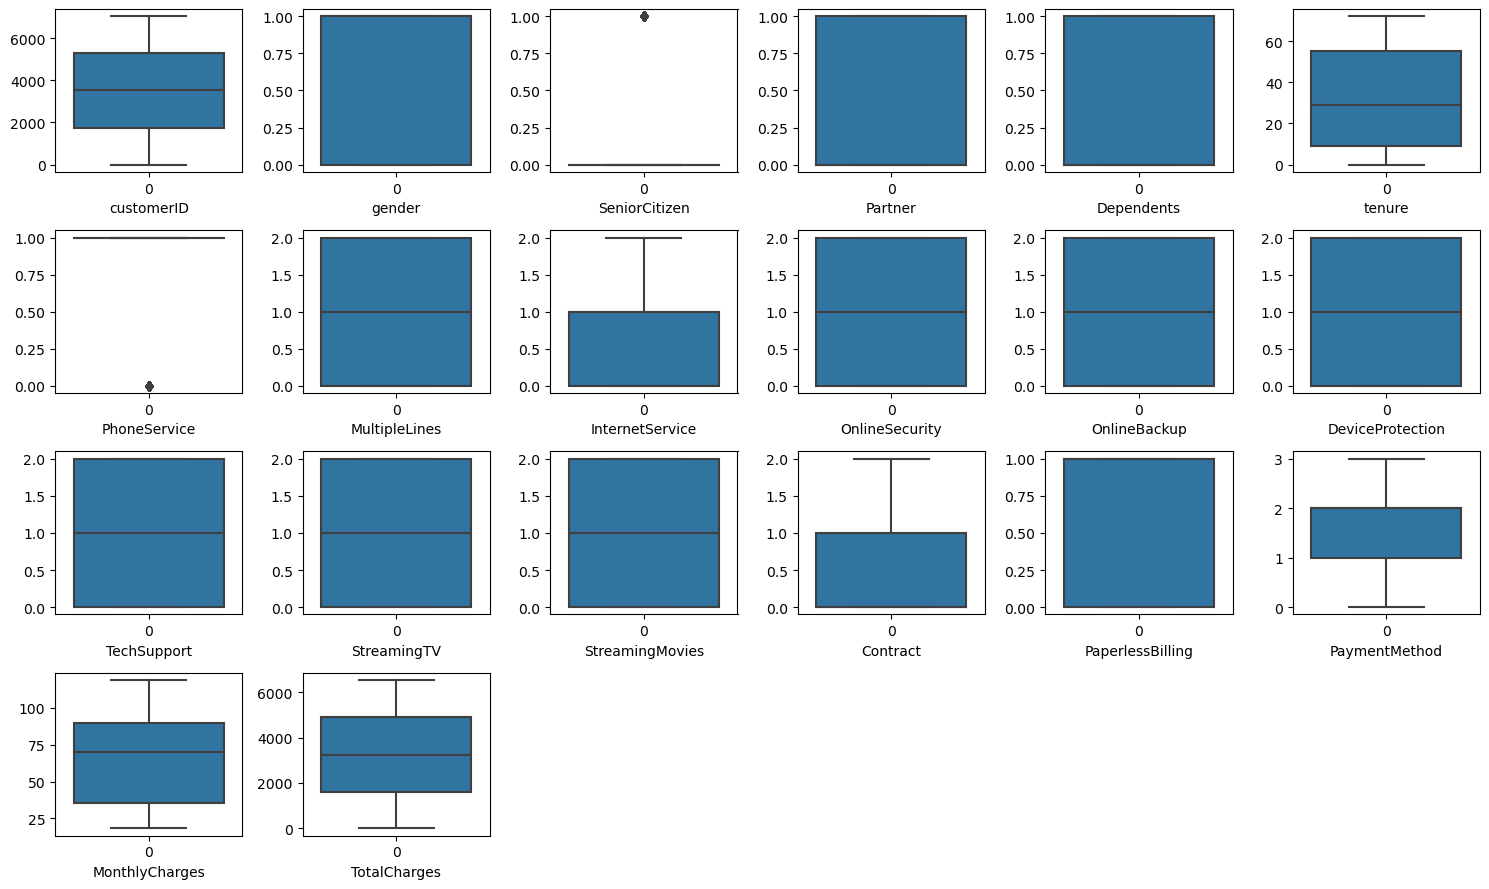

In [88]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if graph<=21:#this was made 12 just to allow for 6 spaces
        plt.subplot(4,6,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=features[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
From the above visualization plot its evident that there are no outliers, however this is subject to further analysis and reconfirmation using the zscore!

# Step 3.5 - Skewness Check

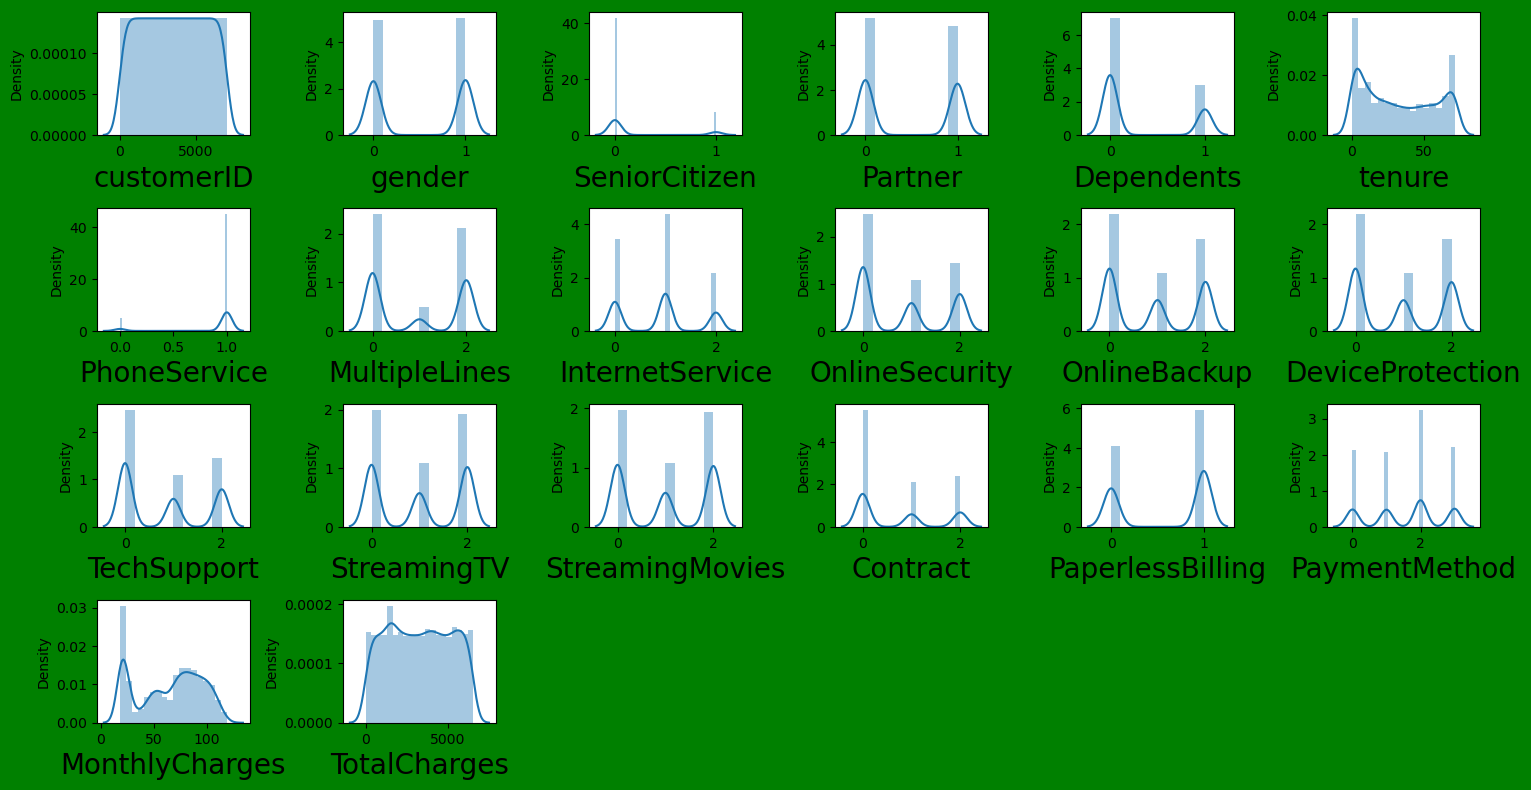

In [89]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=21:#since there are 6 features
        ax = plt.subplot(4,6,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(features[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [90]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
features.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.65.Meaning any value outside +/-0.65 contains skewness. Hence the Columns below are having skewness:

 - SeniorCitizen:           1.83
 - Dependents:              0.87
 - residual sugar:          4.54
 - PhoneService:            2.72
 

# Step 3.6  - Target Variable Check

0.0    5174
1.0    1869
Name: Churn, dtype: int64


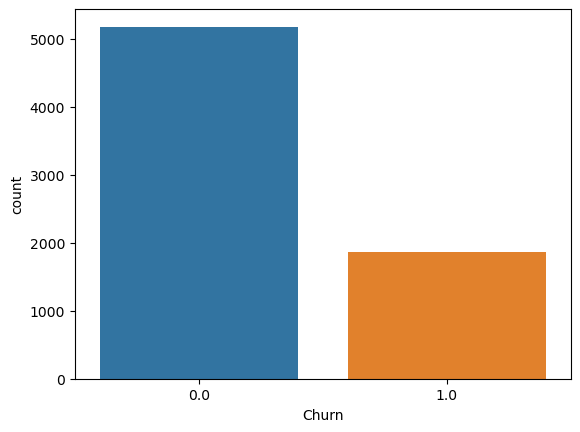

In [91]:
ax=sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

from the above graph the we can see that the data is imbalanced and it has two classes 

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates

In [92]:
#Recheking shape of original data
df.shape

(7043, 21)

In [93]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(7043, 21)

In [ ]:
# it appears that there are not duplicates

From the above graph we can see:
 - the dependent variable has now two classes of quality with the majority being Class 0 and minority Class 1
 - there is a clear case of imbalanced data and this will be resolved during futher preprocessing using sampling techniques

# Step 4.3 - Rechecking the current Relationship btw Variables
# Bivariate Analysis

In [95]:
#seperating the variables into X and Y variables
X=df.drop(columns=['Churn'])
Y=df['Churn']

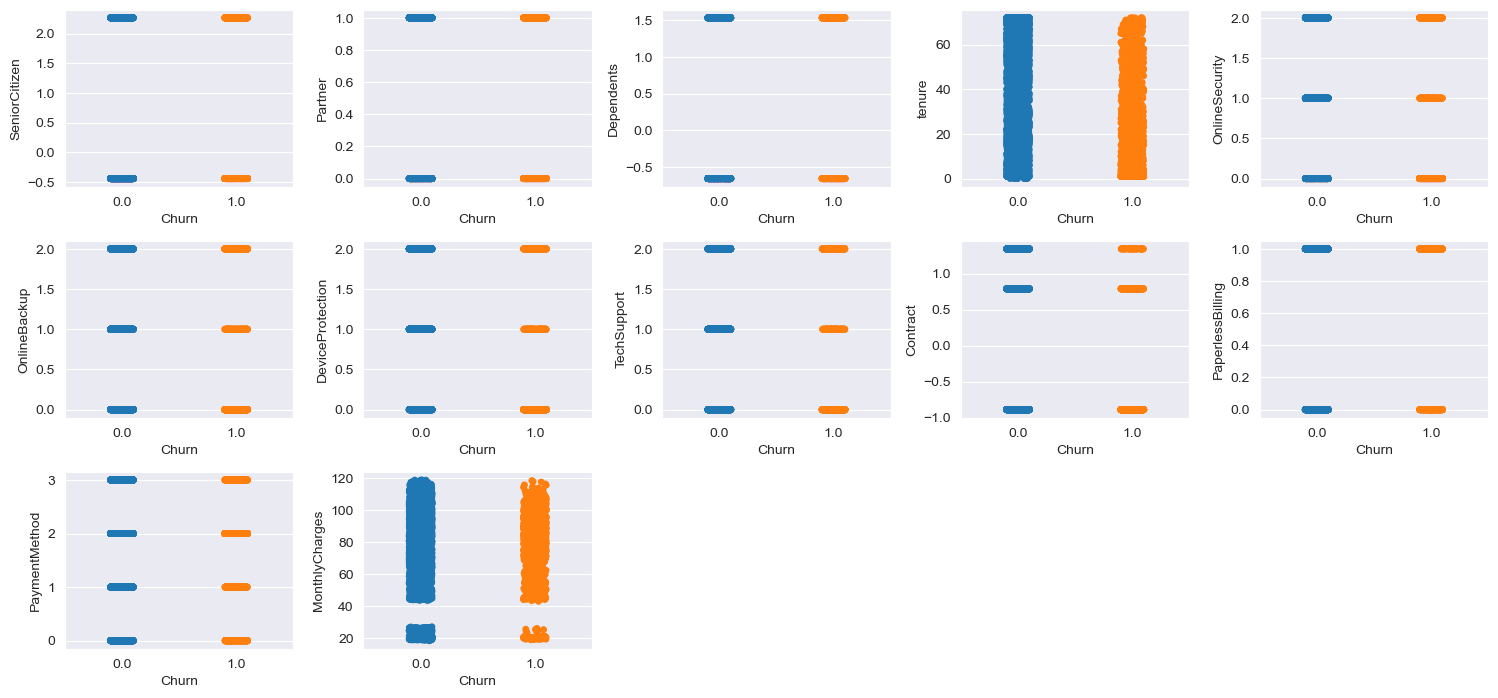

In [236]:
#Lets visualize our current data using a stripplot
plt.figure(figsize=(15,9))#dimension only
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in X:#triggering your for loop
    if plotnumber<=20:#since there are 9 features
        ax = plt.subplot(4,5,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.stripplot(Y,X[column])#performing a strip plot
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#

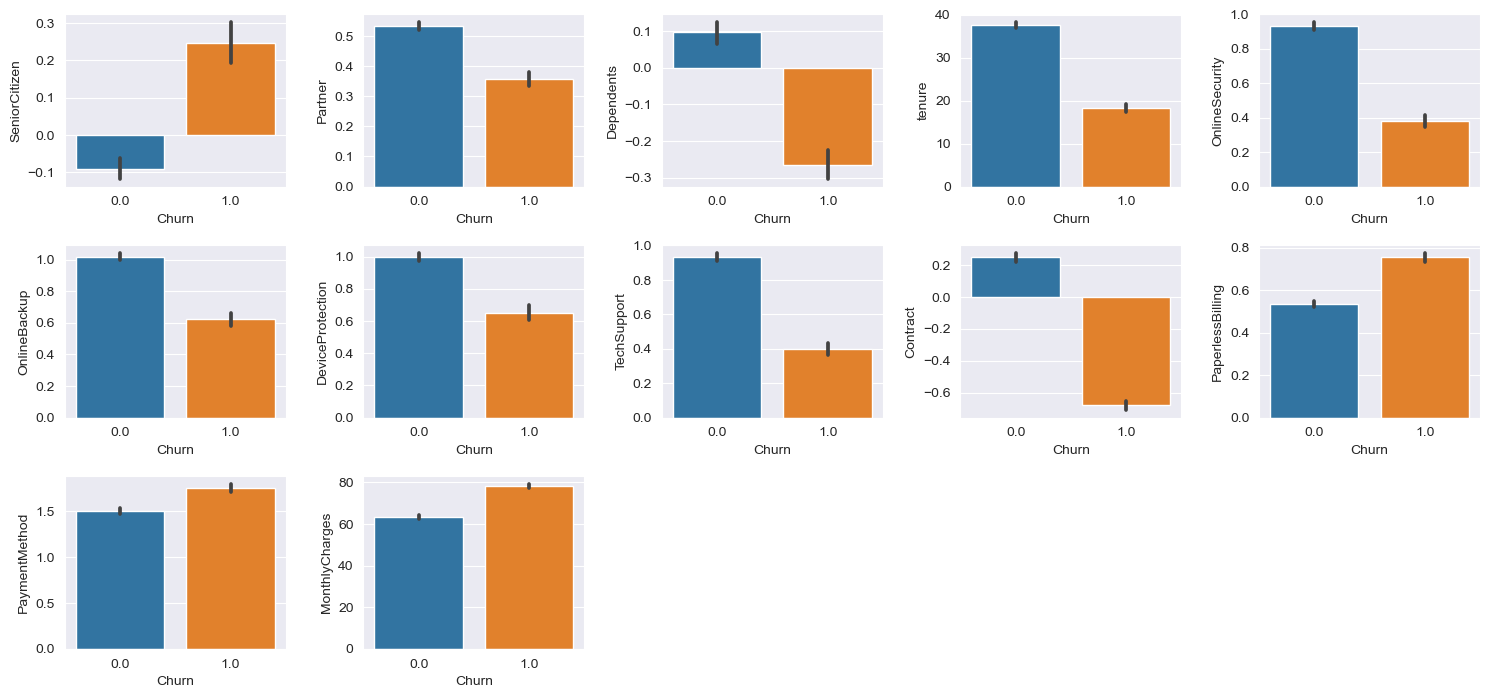

In [240]:
#Lets visualize our current data using a stripplot
plt.figure(figsize=(15,9))#dimension only
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in X:#triggering your for loop
    if plotnumber<=20:#since there are 9 features
        ax = plt.subplot(4,5,plotnumber)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.barplot(Y,X[column])#performing a strip plot
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#

From the above strip plot and bar plots , you can see that these plots reveals the bivariate relationship between the features and the target(churn);

- majority churned based on the payment method
- majority churned because of monthly charges
- less customers churned based on the online backup
- less customers churned based on device protection
- less customers churned based on techsupport services
- majority of customers churned based on paperless billing
- less customers churned based on online security
- less customers churned based on tenureand partners

# Step 4.4 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

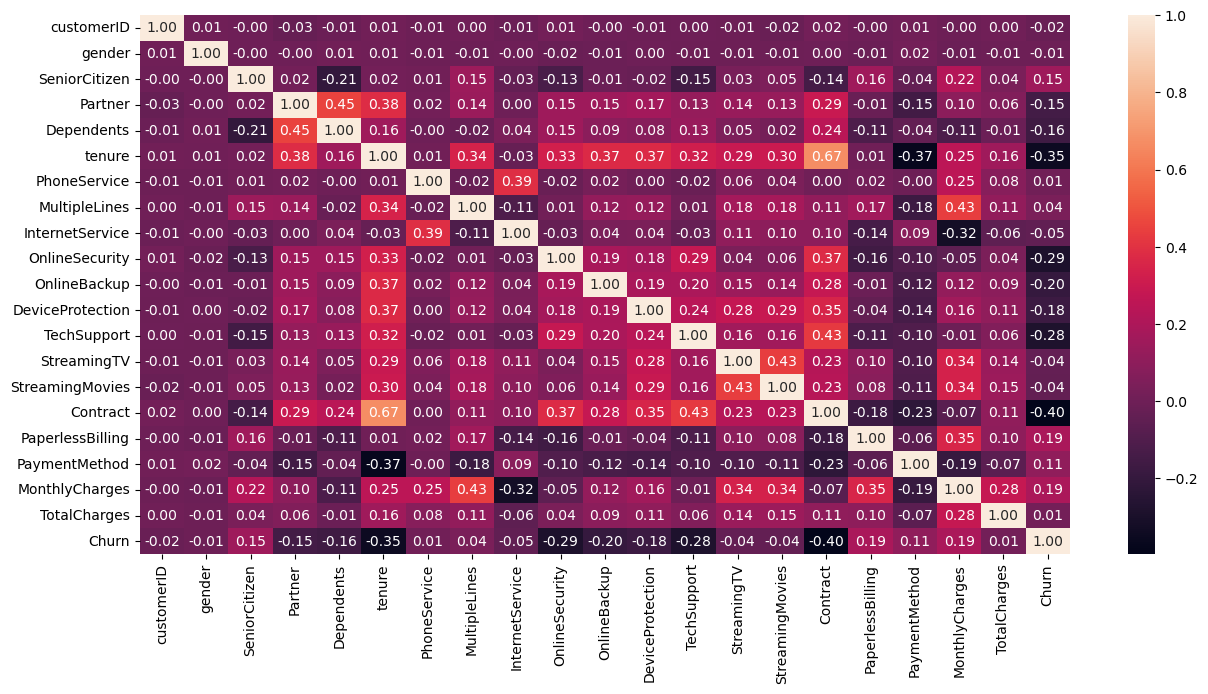

In [98]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap we can see that the pairs of features have some noticeable correllation between them;
 - Contract vs tenure has a correlation of 67%


However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [99]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 0.91189045, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.21690598,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [-0.47070074,  0.99053183, -0.43991649, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-0.07574495, -1.00955867, -0.43991649, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 1.18683477,  0.99053183,  2.27315869, ...,  1.33486261,
         0.32033821, -0.31653445],
       [-0.63694614,  0.99053183, -0.43991649, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [100]:
#checking the shape
X_Scaled.shape

(7043, 20)

Now we shall treat the above shape as an array of numbers(tuple) where 1359 and 11 are the zeroth and first index respectively.

In [101]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [102]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(11) or (0,1,2,3,4,5,6,7,8,9,10), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 11. Now all the columns in X_Scaled which is (0,1,2,3,4,5,6,7,8,9,10,) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [103]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘quality’ )
vif

vif          Features
0   1.002435        customerID
1   1.001719            gender
2   1.149739     SeniorCitizen
3   1.461981           Partner
4   1.382218        Dependents
5   2.754763            tenure
6   1.622292      PhoneService
7   1.392868     MultipleLines
8   1.826783   InternetService
9   1.248006    OnlineSecurity
10  1.186400      OnlineBackup
11  1.280351  DeviceProtection
12  1.303611       TechSupport
13  1.443673       StreamingTV
14  1.442829   StreamingMovies
15  2.475214          Contract
16  1.203898  PaperlessBilling
17  1.181360     PaymentMethod
18  2.830601    MonthlyCharges
19  1.108741      TotalCharges

From the above vif dataframe,we are setting a vif threshold of 5, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, there is no vif figure higher than 5

In [104]:
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         5375.0     0.0              0      1.0         0.0       1   
1         3962.0     1.0              0      0.0         0.0      34   
2         2564.0     1.0              0      0.0         0.0       2   
3         5535.0     1.0              0      0.0         0.0      45   
4         6511.0     0.0              0      0.0         0.0       2   
...          ...     ...            ...      ...         ...     ...   
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7040      3367.0     0.0              0      1.0         1.0      11   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0              0.0            1.0              0.0             0.0  ...   
1              1.0            0.0              0.0             2.0  ...   
2              1.0            0.0              0.0             2.0  ...   
3              0.0            1.0              0.0             2.0  ...   
4              1.0            0.0              1.0             0.0  ...   
...            ...            ...              ...             ...  ...   
7038           1.0            2.0              0.0             2.0  ...   
7039           1.0            2.0              1.0             0.0  ...   
7040           0.0            1.0              0.0             2.0  ...   
7041           1.0            2.0              1.0             0.0  ...   
7042           1.0            0.0              1.0             2.0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  0.0          0.0          0.0              0.0       0.0   
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
3                  2.0          2.0          0.0              0.0       1.0   
4                  0.0          0.0          0.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7040               0.0          0.0          0.0              0.0       0.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                  1.0            2.0           29.85        2505.0    0.0  
1                  0.0            3.0           56.95        1466.0    0.0  
2                  1.0            3.0           53.85         157.0    1.0  
3                  0.0            0.0           42.30        1400.0    0.0  
4                  1.0            2.0           70.70         925.0    1.0  
...                ...            ...             ...           ...    ...  
7038               1.0            3.0           84.80        1597.0    0.0  
7039               1.0            1.0          103.20        5698.0    0.0  
7040               1.0            2.0           29.60        2994.0    0.0  
7041               1.0            3.0           74.40        2660.0    1.0  
7042               1.0            0.0          105.65        5407.0    0.0  

[7043 rows x 21 columns]

# Step 4.5 - Removal of Outliers

This will be achieved using the zscore

In [107]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

customerID    gender  SeniorCitizen   Partner  Dependents    tenure  \
0       0.911890  1.009559       0.439916  1.034530    0.654012  1.277445   
1       0.216906  0.990532       0.439916  0.966622    0.654012  0.066327   
2       0.470701  0.990532       0.439916  0.966622    0.654012  1.236724   
3       0.990587  0.990532       0.439916  0.966622    0.654012  0.514251   
4       1.470632  1.009559       0.439916  0.966622    0.654012  1.236724   
...          ...       ...            ...       ...         ...       ...   
7038    0.655145  0.990532       0.439916  1.034530    1.529024  0.340876   
7039    0.981733  1.009559       0.439916  1.034530    1.529024  1.613701   
7040    0.075745  1.009559       0.439916  1.034530    1.529024  0.870241   
7041    1.186835  0.990532       2.273159  1.034530    0.654012  1.155283   
7042    0.636946  0.990532       0.439916  0.966622    0.654012  1.369379   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0         3.054010       0.062723         1.183234        0.918838  ...   
1         0.327438       0.991588         1.183234        1.407321  ...   
2         0.327438       0.991588         1.183234        1.407321  ...   
3         3.054010       0.062723         1.183234        1.407321  ...   
4         0.327438       0.991588         0.172250        0.918838  ...   
...            ...            ...              ...             ...  ...   
7038      0.327438       1.117034         1.183234        1.407321  ...   
7039      0.327438       1.117034         0.172250        0.918838  ...   
7040      3.054010       0.062723         1.183234        1.407321  ...   
7041      0.327438       1.117034         0.172250        0.918838  ...   
7042      0.327438       0.991588         0.172250        1.407321  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0             1.027910     0.925262     1.113495         1.121405  0.828207   
1             1.245111     0.925262     1.113495         1.121405  0.371271   
2             1.027910     0.925262     1.113495         1.121405  0.828207   
3             1.245111     1.396299     1.113495         1.121405  0.371271   
4             1.027910     0.925262     1.113495         1.121405  0.828207   
...                ...          ...          ...              ...       ...   
7038          1.245111     1.396299     1.146547         1.138411  0.371271   
7039          1.245111     0.925262     1.146547         1.138411  0.371271   
7040          1.027910     0.925262     1.113495         1.121405  0.828207   
7041          1.027910     0.925262     1.113495         1.121405  0.828207   
7042          1.245111     1.396299     1.146547         1.138411  1.570749   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges     Churn  
0             0.829798       0.398558        1.160323      0.398608  0.601023  
1             1.205113       1.334863        0.259629      0.948762  0.601023  
2             0.829798       1.334863        0.362660      1.641883  1.663829  
3             1.205113       1.474052        0.746535      0.983710  0.601023  
4             0.829798       0.398558        0.197365      1.235224  1.663829  
...                ...            ...             ...           ...       ...  
7038          0.829798       1.334863        0.665992      0.879397  0.601023  
7039          0.829798       0.537747        1.277533      1.292099  0.601023  
7040          0.829798       0.398558        1.168632      0.139680  0.601023  
7041          0.829798       1.334863        0.320338      0.316534  1.663829  
7042          0.829798       1.474052        1.358961      1.138013  0.601023  

[7043 rows x 21 columns]

In [109]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(7043, 21)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [110]:
#index number
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [112]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (7043, 21)
New DataFrame (7043, 21)
total_dropped_rows 682


A Total of 682 outliers have been removed! Lets move on!

In [113]:
#Checking the new dataframe with non-outliers
df_new

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
1         3962.0     1.0              0      0.0         0.0      34   
2         2564.0     1.0              0      0.0         0.0       2   
4         6511.0     0.0              0      0.0         0.0       2   
5         6551.0     0.0              0      0.0         0.0       8   
6         1002.0     1.0              0      0.0         1.0      22   
...          ...     ...            ...      ...         ...     ...   
7037      1758.0     0.0              0      0.0         0.0      72   
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
1              1.0            0.0              0.0             2.0  ...   
2              1.0            0.0              0.0             2.0  ...   
4              1.0            0.0              1.0             0.0  ...   
5              1.0            2.0              1.0             0.0  ...   
6              1.0            2.0              1.0             0.0  ...   
...            ...            ...              ...             ...  ...   
7037           1.0            0.0              2.0             1.0  ...   
7038           1.0            2.0              0.0             2.0  ...   
7039           1.0            2.0              1.0             0.0  ...   
7041           1.0            2.0              1.0             0.0  ...   
7042           1.0            0.0              1.0             2.0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
4                  0.0          0.0          0.0              0.0       0.0   
5                  2.0          0.0          2.0              2.0       0.0   
6                  0.0          0.0          2.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7037               1.0          1.0          1.0              1.0       2.0   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
1                  0.0            3.0           56.95        1466.0    0.0  
2                  1.0            3.0           53.85         157.0    1.0  
4                  1.0            2.0           70.70         925.0    1.0  
5                  1.0            2.0           99.65        6104.0    1.0  
6                  1.0            1.0           89.10        1550.0    0.0  
...                ...            ...             ...           ...    ...  
7037               1.0            0.0           21.15         770.0    0.0  
7038               1.0            3.0           84.80        1597.0    0.0  
7039               1.0            1.0          103.20        5698.0    0.0  
7041               1.0            3.0           74.40        2660.0    1.0  
7042               1.0            0.0          105.65        5407.0    0.0  

[6361 rows x 21 columns]

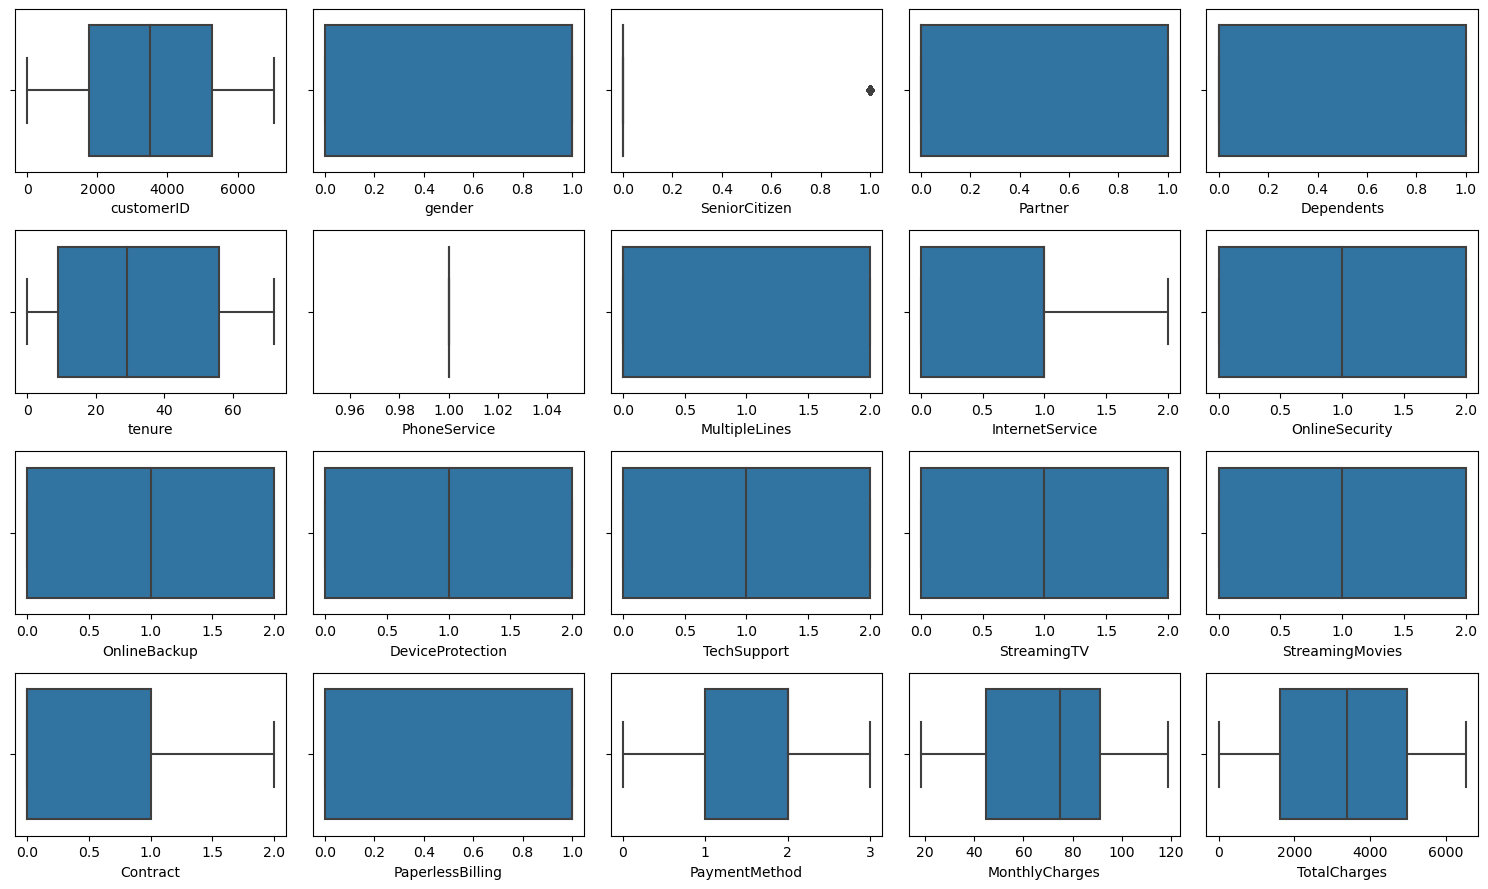

In [117]:
#reChecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=20:#this was made 12 just to allow for 6 spaces
        plt.subplot(4,5,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(df_new[column])#performing a box plot starting with 
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that the real outliers have been removed across the features!

# Step 4.6 - Transforming Data to Remove Skewness using Power transformation

In [118]:
#rechecking for skewness...
df_new.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

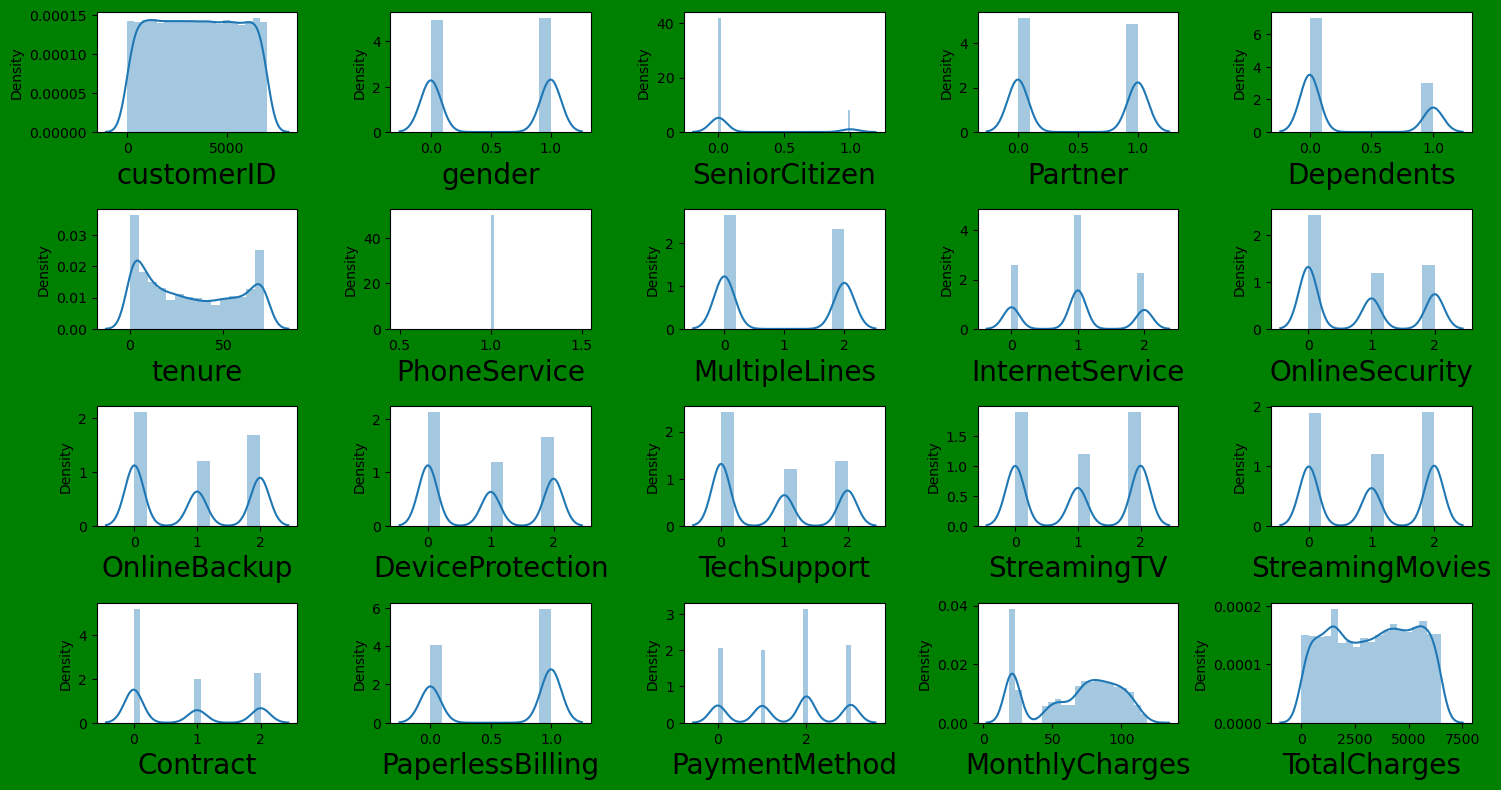

In [119]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=20:#since there are 6 features
        ax = plt.subplot(4,5,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 10
plt.tight_layout()#This is just to show you data in a compact form. 

Let lets go ahead and apply Power Transformation!

In [120]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [121]:
df_new.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [124]:
#extracting the columns that are skewed
data=['SeniorCitizen', 'Dependents', 'Contract']

In [125]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[data] = scaler.fit_transform(df_new[data].values)

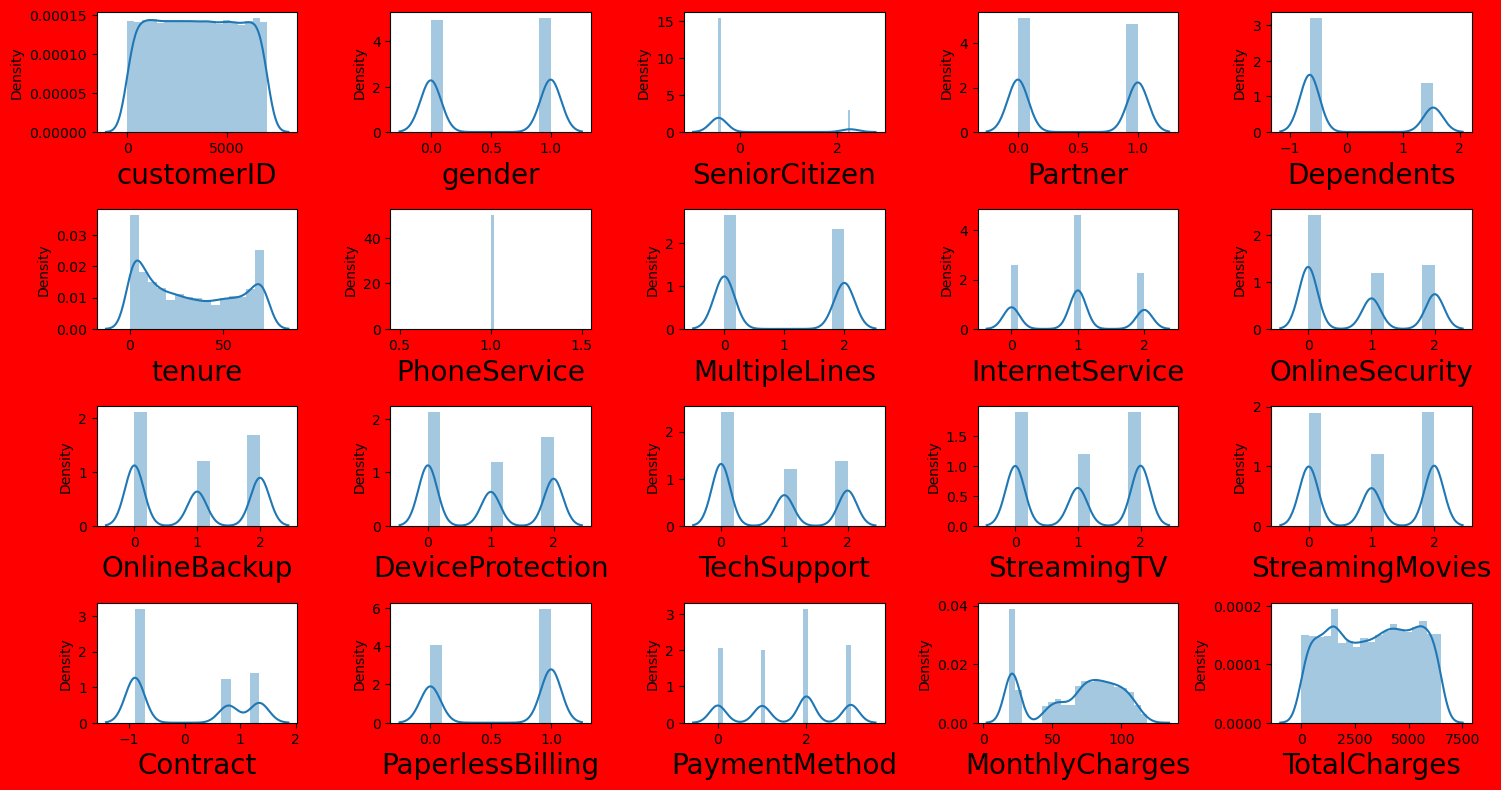

In [126]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(15,8), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=20:#since there are 6 features
        ax = plt.subplot(4,5,plotnumber)#2,5 means arrange the graphs in 2-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 10
plt.tight_layout()#This is just to show you data in a compact form. 

From the above we can see that skewness has been removed!

# check for stronger correlation between features and target

In [128]:
df_new.corr()['Churn'].sort_values()

Contract           -0.410179
tenure             -0.349681
OnlineSecurity     -0.290086
TechSupport        -0.280404
OnlineBackup       -0.202671
DeviceProtection   -0.177710
Dependents         -0.159481
Partner            -0.154692
InternetService    -0.059137
StreamingMovies    -0.041903
StreamingTV        -0.036029
customerID         -0.016263
gender             -0.011212
TotalCharges        0.004952
MultipleLines       0.040207
PaymentMethod       0.103970
SeniorCitizen       0.148802
PaperlessBilling    0.196368
MonthlyCharges      0.216816
Churn               1.000000
PhoneService             NaN
Name: Churn, dtype: float64

In [130]:
# Lets drop features with no correlation with the targe

df_new.drop(columns=['InternetService','StreamingMovies','StreamingTV','customerID','gender','TotalCharges','MultipleLines','PhoneService'],axis=1,inplace=True)

# Step 4.7 - Seperating the datasets into X and Y variables

In [131]:
#seperation
X=df_new.drop(columns=['Churn'])
Y=df_new['Churn']

# Transforming data into standard normal distribution

In [132]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-0.44159123, -0.97224479, -0.65360017, ..., -1.21176486,
         1.33544287, -0.33661675],
       [-0.44159123, -0.97224479, -0.65360017, ...,  0.82524261,
         1.33544287, -0.43843231],
       [-0.44159123, -0.97224479, -0.65360017, ...,  0.82524261,
         0.39969137,  0.11498455],
       ...,
       [-0.44159123,  1.02854755,  1.52998737, ...,  0.82524261,
        -0.53606013,  1.18240581],
       [ 2.26453771,  1.02854755, -0.65360017, ...,  0.82524261,
         1.33544287,  0.23650636],
       [-0.44159123, -0.97224479, -0.65360017, ...,  0.82524261,
        -1.47181163,  1.26287295]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [133]:
#reconfirming that mean is 0
X_Scaled.mean()

-5.585149628675525e-19

In [134]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# Imbalancing of Target Variable

0.0    5174
1.0    1869
Name: Churn, dtype: int64


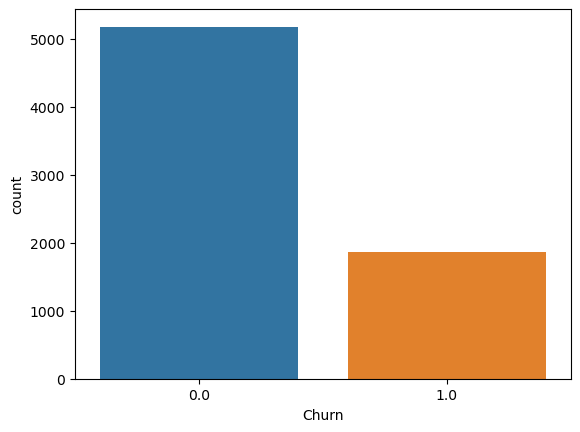

In [137]:
#Lets visualize data distribution amongst the new Binary classes
ax=sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

From the above graph we can see:

- the dependent variable has two classes of quality with the majority being Class 0 and minority Class 1
- there is a clear case of imbalanced data and this will be resolved during futher preprocessing using sampling techniques

# Step 5 - MODEL BUILDING

# Step 5.1 - Logistic Regression

# Best Random State and Balancing Target Data(Oversampling)

In [138]:
#Using LogisticRegression to get the best Random state and apply SMOTE Oversampling technique
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    lr.fit(x_train_ns,y_train_ns)
    pred_train=lr.predict(x_train_ns)
    pred_test=lr.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes before fitCounter({0.0: 3723, 1.0: 2792})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  75.7 and 77.2 respectively
The number of classes before fitCounter({0.0: 3713, 1.0: 1375})
The number of classes before fitCounter({0.0: 3713, 1.0: 2784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  75.4 and 77.3 respectively
The number of classes before fitCounter({0.0: 3727, 1.0: 1361})
The number of classes before fitCounter({0.0: 3727, 1.0: 2795})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  75.9 and 76.9 respectively
The number of classes before fitCounter({0.0: 3729, 1.0: 1359})
The number of classes before fitCounter({0.0: 3729, 1.0: 2796})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.3 and 76.5 respectively
The number of classes before fitCounter({0.0: 3730, 1.0: 1358})
The number of classes before fitCounter({0.0: 3730, 

The best accuracy is 79.30% at random state 193

We have found best_random state value as 193. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [139]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=193,test_size=0.20)

In [140]:
x_train.shape

(5088, 12)

In [141]:
x_test.shape

(1273, 12)

In [142]:
y_train.shape

(5088,)

In [143]:
y_test.shape

(1273,)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [144]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 3737, 1.0: 1351})
The number of classes after fitCounter({0.0: 3737, 1.0: 2802})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 1351 to 2802.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [145]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train_ns)
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))
Train_Accuracy_lr= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  79.58
Confusion Matrix  [[742 183]
 [ 77 271]]
Classification Report                precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       925
         1.0       0.60      0.78      0.68       348

    accuracy                           0.80      1273
   macro avg       0.75      0.79      0.76      1273
weighted avg       0.82      0.80      0.80      1273



LogisticRegression is producing good accuracy 79.58%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [146]:
#Validation accuracy
vac=cross_val_score(lr,X,Y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.80911233 0.80110063 0.79009434 0.80503145 0.80345912]
Cross Validation Score is  0.801759573532536


# Difference between Accuracy Score and Cross Validation Score

In [147]:
Test_Accuracy_lr

0.795758051846033

In [148]:
CV_Score_lr

0.801759573532536

In [149]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.006001521686503031


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.006) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.2 - DecisionTree Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [150]:
#Using Decision tree Classifier to get the best Random state and apply SMOTE Oversampling technique
dt=DecisionTreeClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    dt.fit(x_train_ns,y_train_ns)
    pred_train=dt.predict(x_train_ns)
    pred_test=dt.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes before fitCounter({0.0: 3723, 1.0: 2792})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  72.1 and 99.7 respectively
The number of classes before fitCounter({0.0: 3713, 1.0: 1375})
The number of classes before fitCounter({0.0: 3713, 1.0: 2784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  71.5 and 99.7 respectively
The number of classes before fitCounter({0.0: 3727, 1.0: 1361})
The number of classes before fitCounter({0.0: 3727, 1.0: 2795})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  74.2 and 99.8 respectively
The number of classes before fitCounter({0.0: 3729, 1.0: 1359})
The number of classes before fitCounter({0.0: 3729, 1.0: 2796})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  71.2 and 99.8 respectively
The number of classes before fitCounter({0.0: 3730, 1.0: 1358})
The number of classes before fitCounter({0.0: 3730, 

The best accuracy is 75.6% at random state 60

We have found best random state value as 60. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [151]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=60,test_size=0.20)

In [152]:
x_train.shape

(5088, 12)

In [153]:
x_test.shape

(1273, 12)

In [154]:
y_train.shape

(5088,)

In [155]:
y_test.shape

(1273,)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points. 

In [156]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 3725, 1.0: 1363})
The number of classes after fitCounter({0.0: 3725, 1.0: 2793})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 1363 to 2793.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [157]:
dt=LogisticRegression()
dt.fit(x_train_ns,y_train_ns)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train_ns)
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))
Train_Accuracy_dt= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  77.93
Confusion Matrix  [[726 211]
 [ 70 266]]
Classification Report                precision    recall  f1-score   support

         0.0       0.91      0.77      0.84       937
         1.0       0.56      0.79      0.65       336

    accuracy                           0.78      1273
   macro avg       0.73      0.78      0.75      1273
weighted avg       0.82      0.78      0.79      1273



Decision Tree Model is producing good accuracy - 77.93%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [158]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.80911233 0.80110063 0.79009434 0.80503145 0.80345912]
Cross Validation Score is  0.801759573532536


# Difference between Accuracy Score and Cross Validation Score

In [159]:
Test_Accuracy_dt

0.779261586802828

In [160]:
CV_Score_dt

0.801759573532536

In [161]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.02249798672970804


From the above you can see that difference between Accuracy and Cross Validation score is low(0.022) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets try ensembling Techniques!

# Step 5.3 - RandomForest Classifier

# Best Random State and Balancing Data(Oversampling)

In [162]:
#Using RandomForest Classifier to get the best Random state and apply SMOTE Oversampling technique
rf=RandomForestClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    rf.fit(x_train_ns,y_train_ns)
    pred_train=rf.predict(x_train_ns)
    pred_test=rf.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes before fitCounter({0.0: 3723, 1.0: 2792})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  77.7 and 99.6 respectively
The number of classes before fitCounter({0.0: 3713, 1.0: 1375})
The number of classes before fitCounter({0.0: 3713, 1.0: 2784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  76.3 and 99.7 respectively
The number of classes before fitCounter({0.0: 3727, 1.0: 1361})
The number of classes before fitCounter({0.0: 3727, 1.0: 2795})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  76.4 and 99.8 respectively
The number of classes before fitCounter({0.0: 3729, 1.0: 1359})
The number of classes before fitCounter({0.0: 3729, 1.0: 2796})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.1 and 99.8 respectively
The number of classes before fitCounter({0.0: 3730, 1.0: 1358})
The number of classes before fitCounter({0.0: 3730, 

The best accuracy is 80% at random state 180

We have found best_random state value as 180. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [163]:
#using the random state of 81
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=180,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [164]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes after fitCounter({0.0: 3723, 1.0: 2792})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 1365 to 2792.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [165]:
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train_ns)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  80.05
Confusion Matrix  [[820 119]
 [135 199]]
Classification Report                precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       939
         1.0       0.63      0.60      0.61       334

    accuracy                           0.80      1273
   macro avg       0.74      0.73      0.74      1273
weighted avg       0.80      0.80      0.80      1273



RandomForest Classifier is producing good accuracy = 80%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [166]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.77769049 0.79323899 0.77515723 0.77987421 0.79245283]
Cross Validation Score is  0.7836827530668407


# Difference between Accuracy Score and Cross Validation Score

In [167]:
Test_Accuracy_rf

0.800471327572663

In [168]:
CV_Score_rf

0.7836827530668407

In [169]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.016788574505822385


From the above you can see that difference between Accuracy and Cross Validation score is very low(0.0167) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further ensemble Models!

# Step 5.4 - AdaBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [170]:
#Using AdaBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
ada=AdaBoostClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ada.fit(x_train_ns,y_train_ns)
    pred_train=ada.predict(x_train_ns)
    pred_test=ada.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes before fitCounter({0.0: 3723, 1.0: 2792})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  77.1 and 79.9 respectively
The number of classes before fitCounter({0.0: 3713, 1.0: 1375})
The number of classes before fitCounter({0.0: 3713, 1.0: 2784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  78.4 and 80.1 respectively
The number of classes before fitCounter({0.0: 3727, 1.0: 1361})
The number of classes before fitCounter({0.0: 3727, 1.0: 2795})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  75.6 and 80.0 respectively
The number of classes before fitCounter({0.0: 3729, 1.0: 1359})
The number of classes before fitCounter({0.0: 3729, 1.0: 2796})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  78.6 and 79.6 respectively
The number of classes before fitCounter({0.0: 3730, 1.0: 1358})
The number of classes before fitCounter({0.0: 3730, 

The best accuracy is 81.2% at random state 41

We have found best_random state value as 41. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [171]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=41,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [172]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 3732, 1.0: 1356})
The number of classes after fitCounter({0.0: 3732, 1.0: 2799})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 1356 to 2799.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [173]:
ada=AdaBoostClassifier()
ada.fit(x_train_ns,y_train_ns)
pred_test=ada.predict(x_test)
pred_train=ada.predict(x_train_ns)
Test_Accuracy_ada= (accuracy_score(y_test,pred_test))
Train_Accuracy_ada= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  81.07
Confusion Matrix  [[773 157]
 [ 84 259]]
Classification Report                precision    recall  f1-score   support

         0.0       0.90      0.83      0.87       930
         1.0       0.62      0.76      0.68       343

    accuracy                           0.81      1273
   macro avg       0.76      0.79      0.77      1273
weighted avg       0.83      0.81      0.82      1273



AdaBoostClassifier is producing good accuracy = 81.07%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [174]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.81146897 0.80110063 0.79874214 0.79716981 0.80110063]
Cross Validation Score is  0.8019164356963939


# Difference between Accuracy Score and Cross Validation Score

In [175]:
Test_Accuracy_ada

0.8106834249803614

In [176]:
CV_Score_ada

0.8019164356963939

In [177]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.008766989283967463


From the above you can see that difference between Accuracy and Cross Validation score is negligible(0.0087) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further Models!

# Step 5.5 - GradientBoosting Classifier

# Best Random State and Balancing Data(Oversampling)

In [178]:
#Using GradientBoosting Classifier to get the best Random state and apply SMOTE Oversampling technique
gb=GradientBoostingClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    gb.fit(x_train_ns,y_train_ns)
    pred_train=gb.predict(x_train_ns)
    pred_test=gb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes before fitCounter({0.0: 3723, 1.0: 2792})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  78.5 and 83.0 respectively
The number of classes before fitCounter({0.0: 3713, 1.0: 1375})
The number of classes before fitCounter({0.0: 3713, 1.0: 2784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  78.7 and 83.4 respectively
The number of classes before fitCounter({0.0: 3727, 1.0: 1361})
The number of classes before fitCounter({0.0: 3727, 1.0: 2795})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  76.0 and 83.5 respectively
The number of classes before fitCounter({0.0: 3729, 1.0: 1359})
The number of classes before fitCounter({0.0: 3729, 1.0: 2796})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  78.5 and 83.1 respectively
The number of classes before fitCounter({0.0: 3730, 1.0: 1358})
The number of classes before fitCounter({0.0: 3730, 

The best accuracy is 81.2% at random state 9

We have found best_random state value as 9. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [179]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=9,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [180]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 3718, 1.0: 1370})
The number of classes after fitCounter({0.0: 3718, 1.0: 2788})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 1370 to 2788.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [181]:
gb=GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train_ns)
Test_Accuracy_gb= (accuracy_score(y_test,pred_test))
Train_Accuracy_gb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  81.54
Confusion Matrix  [[806 138]
 [ 97 232]]
Classification Report                precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       944
         1.0       0.63      0.71      0.66       329

    accuracy                           0.82      1273
   macro avg       0.76      0.78      0.77      1273
weighted avg       0.82      0.82      0.82      1273



GradientBoosting Classifier is producing good accuracy = 81.54%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [182]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.81304006 0.80031447 0.78930818 0.79323899 0.80110063]
Cross Validation Score is  0.799400465398924


# Difference between Accuracy Score and Cross Validation Score

In [183]:
Test_Accuracy_gb

0.8153967007069913

In [184]:
CV_Score_gb

0.799400465398924

In [185]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.015996235308067375


From the above you can see that difference between Accuracy and Cross Validation score is low(0.0159) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.6 - XGBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [186]:
#Using XGBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
xgb=XGBClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    xgb.fit(x_train_ns,y_train_ns)
    pred_train=xgb.predict(x_train_ns)
    pred_test=xgb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes before fitCounter({0.0: 3723, 1.0: 2792})
[23:37:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state:- 0 Testing Accuracy and Training Accuracy are:-  77.9 and 92.8 respectively
The number of classes before fitCounter({0.0: 3713, 1.0: 1375})
The number of classes before fitCounter({0.0: 3713, 1.0: 2784})
[23:37:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state:- 1 Testing Accuracy and Training Accuracy are:-  78.2 and 92.9 respectively
The number of classes before fitCounter({0.0: 3727, 1.

The best accuracy is 80.1% at random state 9

We have found best_random state value as 9. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [187]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=9,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [188]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 3718, 1.0: 1370})
The number of classes after fitCounter({0.0: 3718, 1.0: 2788})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 1370 to 2788.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [189]:
xgb=XGBClassifier()
xgb.fit(x_train_ns,y_train_ns)
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train_ns)
Test_Accuracy_xgb= (accuracy_score(y_test,pred_test))
Train_Accuracy_xgb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

[23:42:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test_Accuracy  79.42
Confusion Matrix  [[815 129]
 [133 196]]
Classification Report                precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       944
         1.0       0.60      0.60      0.60       329

    accuracy                           0.79      1273
   macro avg       0.73      0.73      0.73      1273
weighted avg       0.79      0.79      0.79      1273



XGBoost Classifier is producing good accuracy - 79.42%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [190]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[23:42:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# Difference between Accuracy Score and Cross Validation Score

In [191]:
Test_Accuracy_xgb

0.7941869599371564

In [192]:
CV_Score_xgb

0.7872971290518608

In [193]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.0068898308852956


From the above you can see that difference between Accuracy and Cross Validation score is low(0.0068) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# Step 5.7 - ExtraTrees Classifier

# Best Random State and Balancing Data(Oversampling)

In [194]:
#Using ExtraTrees Classifier to get the best Random state and apply SMOTE Oversampling technique
ex=ExtraTreesClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ex.fit(x_train_ns,y_train_ns)
    pred_train=ex.predict(x_train_ns)
    pred_test=ex.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes before fitCounter({0.0: 3723, 1.0: 2792})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  75.4 and 99.6 respectively
The number of classes before fitCounter({0.0: 3713, 1.0: 1375})
The number of classes before fitCounter({0.0: 3713, 1.0: 2784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  74.7 and 99.7 respectively
The number of classes before fitCounter({0.0: 3727, 1.0: 1361})
The number of classes before fitCounter({0.0: 3727, 1.0: 2795})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  74.9 and 99.8 respectively
The number of classes before fitCounter({0.0: 3729, 1.0: 1359})
The number of classes before fitCounter({0.0: 3729, 1.0: 2796})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.4 and 99.8 respectively
The number of classes before fitCounter({0.0: 3730, 1.0: 1358})
The number of classes before fitCounter({0.0: 3730, 

The best accuracy is 78.60% at random state 102

We have found best_random state value as 102. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [195]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=81,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [196]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 3730, 1.0: 1358})
The number of classes after fitCounter({0.0: 3730, 1.0: 2797})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 1358 to 2797.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [197]:
ex=ExtraTreesClassifier()
ex.fit(x_train_ns,y_train_ns)
pred_test=ex.predict(x_test)
pred_train=ex.predict(x_train_ns)
Test_Accuracy_ex= (accuracy_score(y_test,pred_test))
Train_Accuracy_ex= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  75.73
Confusion Matrix  [[780 152]
 [157 184]]
Classification Report                precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       932
         1.0       0.55      0.54      0.54       341

    accuracy                           0.76      1273
   macro avg       0.69      0.69      0.69      1273
weighted avg       0.76      0.76      0.76      1273



ExtraTress Classifier is producing good accuracy = 92.43%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [198]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.76512176 0.7759434  0.76650943 0.76179245 0.76650943]
Cross Validation Score is  0.767175295320814


# Difference between Accuracy Score and Cross Validation Score

In [199]:
Test_Accuracy_ex

0.7572663000785546

In [200]:
CV_Score_ex

0.767175295320814

In [201]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.00990899524225941


From the above you can see that difference between Accuracy and Cross Validation score is low(0.0099) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# Step 5.8 - Support Vector Classifier(SVC)

# Best Random State and Balancing Data(Oversampling)

In [202]:
#Using SVC to get the best Random state and apply SMOTE Oversampling technique
sv=SVC()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.75)#increasing data by 75% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    sv.fit(x_train_ns,y_train_ns)
    pred_train=sv.predict(x_train_ns)
    pred_test=sv.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0.0: 3723, 1.0: 1365})
The number of classes before fitCounter({0.0: 3723, 1.0: 2792})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  74.9 and 79.9 respectively
The number of classes before fitCounter({0.0: 3713, 1.0: 1375})
The number of classes before fitCounter({0.0: 3713, 1.0: 2784})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  75.3 and 79.9 respectively
The number of classes before fitCounter({0.0: 3727, 1.0: 1361})
The number of classes before fitCounter({0.0: 3727, 1.0: 2795})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  75.9 and 80.1 respectively
The number of classes before fitCounter({0.0: 3729, 1.0: 1359})
The number of classes before fitCounter({0.0: 3729, 1.0: 2796})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.5 and 79.7 respectively
The number of classes before fitCounter({0.0: 3730, 1.0: 1358})
The number of classes before fitCounter({0.0: 3730, 

The best accuracy is 79.50% at random state 41

We have found best_random state value as 79.50. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [203]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=41,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [204]:
#applying the oversampling technique
ove_smp=SMOTE(0.75)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0.0: 3732, 1.0: 1356})
The number of classes after fitCounter({0.0: 3732, 1.0: 2799})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 75% i.e from 1356 to 2799.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [205]:
sv=GradientBoostingClassifier()
sv.fit(x_train_ns,y_train_ns)
pred_test=sv.predict(x_test)
pred_train=sv.predict(x_train_ns)
Test_Accuracy_sv= (accuracy_score(y_test,pred_test))
Train_Accuracy_sv= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  81.23
Confusion Matrix  [[782 148]
 [ 91 252]]
Classification Report                precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       930
         1.0       0.63      0.73      0.68       343

    accuracy                           0.81      1273
   macro avg       0.76      0.79      0.77      1273
weighted avg       0.82      0.81      0.82      1273



Support Vector is producing good accuracy = 81.23%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [206]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.81304006 0.80031447 0.78852201 0.79323899 0.80110063]
Cross Validation Score is  0.7992432326945215


# Difference between Accuracy Score and Cross Validation Score

In [207]:
Test_Accuracy_sv

0.812254516889238

In [208]:
CV_Score_sv

0.7992432326945215

In [209]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.013011284194716533


From the above you can see that difference between Accuracy and Cross Validation score is low(0.013) meaning that our model is very good and not having any overfitting or underfitting problems!!

 Now that we have build 8 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [210]:
#Constructing a dataframe...
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boosting Classifier','Gradient Boosting Classifier', 'XgBoost','Extra Trees Classifer','Support Vector Classifier'],'Accuracy_Score' : [Test_Accuracy_lr,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv],'Cross_Validation_Score':[CV_Score_lr,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score]})
models

Model  Accuracy_Score  Cross_Validation_Score  \
0           Logistic Regression        0.795758                0.801760   
1      Decision Tree Classifier        0.779262                0.801760   
2      Random Forest Classifier        0.800471                0.783683   
3       Ada Boosting Classifier        0.810683                0.801916   
4  Gradient Boosting Classifier        0.815397                0.799400   
5                       XgBoost        0.794187                0.787297   
6         Extra Trees Classifer        0.757266                0.767175   
7     Support Vector Classifier        0.812255                0.799243   

   Accuracy_VS_CVScore  
0             0.006002  
1             0.022498  
2             0.016789  
3             0.008767  
4             0.015996  
5             0.006890  
6             0.009909  
7             0.013011

In [211]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = (models["Accuracy_Score"] * 100).round(2)
models["Cross_Validation_Score"] = (models["Cross_Validation_Score"] * 100).round(2)
models.sort_values(by = 'Accuracy_Score', ascending = False)
models

Model  Accuracy_Score  Cross_Validation_Score  \
0           Logistic Regression           79.58                   80.18   
1      Decision Tree Classifier           77.93                   80.18   
2      Random Forest Classifier           80.05                   78.37   
3       Ada Boosting Classifier           81.07                   80.19   
4  Gradient Boosting Classifier           81.54                   79.94   
5                       XgBoost           79.42                   78.73   
6         Extra Trees Classifer           75.73                   76.72   
7     Support Vector Classifier           81.23                   79.92   

   Accuracy_VS_CVScore  
0             0.006002  
1             0.022498  
2             0.016789  
3             0.008767  
4             0.015996  
5             0.006890  
6             0.009909  
7             0.013011

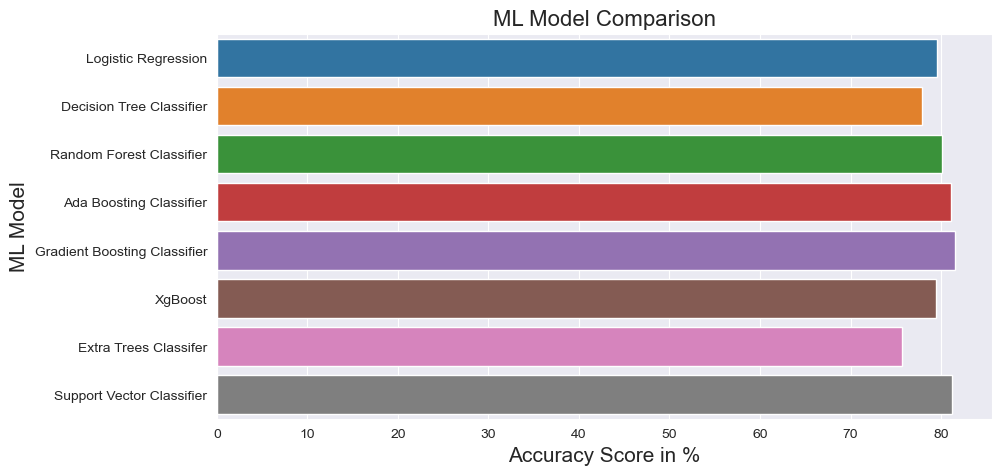

In [212]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that Gradient boost(81.54%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so if we consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

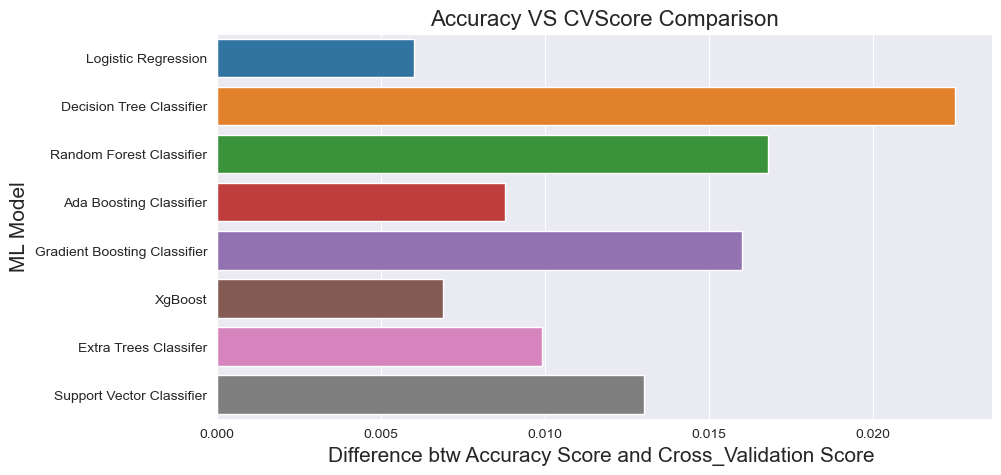

In [213]:
#Now focusing on the differnce btw Accuracy Score and Cross_Validation Scores
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is Logistic Regression Classifier!

# Step 6.2 - Conclusion on Choice of Model

From the above we can see:
 - The Model with least difference is Logistic Regression!

# Hence Optimum Machine Model Chosen = Logistic Regression!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [217]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [218]:
#Gridsearch
gridsearch = GridSearchCV(lr, param_grid, cv=5,scoring="accuracy")
gridsearch.fit(x_train_ns, y_train_ns);

In [219]:
#Get best hyperparameters
gridsearch.best_params_

{'C': 0.026366508987303555,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'lbfgs'}

Now lets use the best parameters.....

In [221]:
#Instantiating using the best parameters...
lr = LogisticRegression(C = 0.026366508987303555,
 max_iter = 100,
 penalty = 'l2',
 solver = 'lbfgs')

In [222]:
#fitting the model...
lr.fit(x_train_ns,y_train_ns)

LogisticRegression(C=0.026366508987303555)

In [223]:
pred_test=lr.predict(x_test)

In [224]:
accuracy_score(y_test,pred_test)

0.7941869599371564

# Step 8 - ROC AUC PLOT

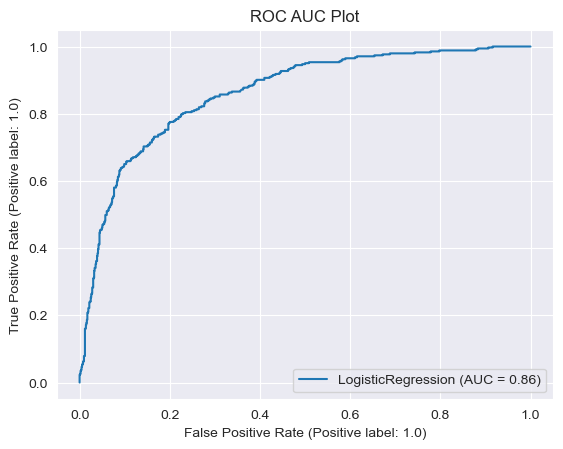

In [225]:
plot_roc_curve(lr,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

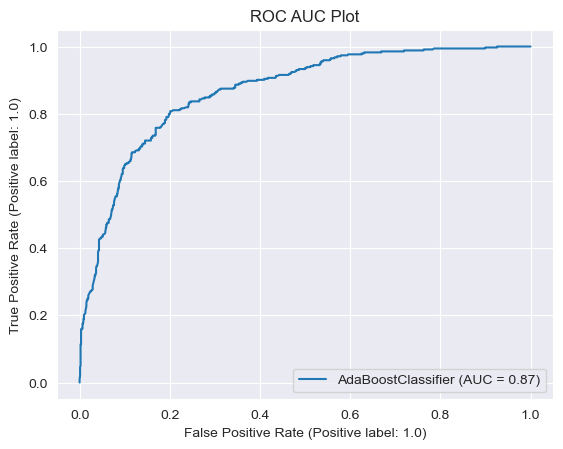

In [226]:
plot_roc_curve(ada,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

From the above we can see:
- Final Accuracy is 79.40% and AUC Score is 86% 
- That the Logistic Regression Classifier has an AUC close to 1(i.e 0.86)

HENCE WE CAN CONCLUDE OUR MODEL IS PRETTY GOOD!!

# Step 9 - MODEL SAVING

In [227]:
filename='Machine_Model_Project_customer_churn'
pickle.dump(ada,open(filename,'wb'))

In [228]:
filename='Machine_Model_Project_customer_churn'
pickle.dump(lr,open(filename,'wb'))